<a href="https://colab.research.google.com/github/Sarthak102/COVID-19-Data-Analysis/blob/main/COVID-19-Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Importing Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Loading data files

In [ ]:
agegroup=pd.read_csv('/content/AgeGroupDetails.csv')
covid_19_india=pd.read_csv('/content/covid_19_india.csv')
hospital_beds=pd.read_csv('/content/HospitalBedsIndia.csv')
individual_details=pd.read_csv('/content/IndividualDetails.csv')

In [ ]:
agegroup.head()

,Sno,AgeGroup,TotalCases,Percentage
0,1,0-9,22,3.18%
1,2,10-19,27,3.90%
2,3,20-29,172,24.86%
3,4,30-39,146,21.10%
4,5,40-49,112,16.18%


In [ ]:
agegroup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Sno         10 non-null     int64 
 1   AgeGroup    10 non-null     object
 2   TotalCases  10 non-null     int64 
 3   Percentage  10 non-null     object
dtypes: int64(2), object(2)
memory usage: 448.0+ bytes


In [ ]:
hospital_beds=hospital_beds[:-2]
hospital_beds.fillna(0,inplace=True)
hospital_beds

,Sno,State/UT,NumPrimaryHealthCenters_HMIS,NumCommunityHealthCenters_HMIS,NumSubDistrictHospitals_HMIS,NumDistrictHospitals_HMIS,TotalPublicHealthFacilities_HMIS,NumPublicBeds_HMIS,NumRuralHospitals_NHP18,NumRuralBeds_NHP18,NumUrbanHospitals_NHP18,NumUrbanBeds_NHP18,Unnamed: 12,Unnamed: 13
0,1.0,Andaman & Nicobar Islands,27,4,0,3,34,1246,27.0,575.0,3.0,500.0,0.0,0.0
1,2.0,Andhra Pradesh,1417,198,31,20,1666,60799,193.0,6480.0,65.0,16658.0,0.0,0.0
2,3.0,Arunachal Pradesh,122,62,0,15,199,2320,208.0,2136.0,10.0,268.0,0.0,0.0
3,4.0,Assam,1007,166,14,33,1220,19115,1176.0,10944.0,50.0,6198.0,0.0,0.0
4,5.0,Bihar,2007,63,33,43,2146,17796,930.0,6083.0,103.0,5936.0,0.0,0.0
5,6.0,Chandigarh,40,2,1,4,47,3756,0.0,0.0,4.0,778.0,0.0,0.0
6,7.0,Chhattisgarh,813,166,12,32,1023,14354,169.0,5070.0,45.0,4342.0,0.0,0.0
7,8.0,Dadra & Nagar Haveli,9,2,1,1,13,568,10.0,273.0,1.0,316.0,0.0,0.0
8,9.0,Daman & Diu,4,2,0,2,8,298,5.0,240.0,0.0,0.0,0.0,0.0
9,10.0,Delhi,534,25,9,47,615,20572,0.0,0.0,109.0,24383.0,0.0,0.0


In [ ]:
hospital_beds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Sno                               36 non-null     float64
 1   State/UT                          36 non-null     object 
 2   NumPrimaryHealthCenters_HMIS      36 non-null     object 
 3   NumCommunityHealthCenters_HMIS    36 non-null     object 
 4   NumSubDistrictHospitals_HMIS      36 non-null     object 
 5   NumDistrictHospitals_HMIS         36 non-null     object 
 6   TotalPublicHealthFacilities_HMIS  36 non-null     object 
 7   NumPublicBeds_HMIS                36 non-null     object 
 8   NumRuralHospitals_NHP18           36 non-null     float64
 9   NumRuralBeds_NHP18                36 non-null     float64
 10  NumUrbanHospitals_NHP18           36 non-null     float64
 11  NumUrbanBeds_NHP18                36 non-null     float64
 12  Unnamed: 1

In [ ]:

for col in hospital_beds.columns[2:]:
    if hospital_beds[col].dtype=='object':
        hospital_beds[col]=hospital_beds[col].astype('int64')

In [ ]:
covid_19_india['Date']=pd.to_datetime(covid_19_india['Date'])
covid_19_india.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-01-02,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-03-02,6:00 PM,Kerala,3,0,0,0,3


In [ ]:
covid_19_india.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Sno                       500 non-null    int64         
 1   Date                      500 non-null    datetime64[ns]
 2   Time                      500 non-null    object        
 3   State/UnionTerritory      500 non-null    object        
 4   ConfirmedIndianNational   500 non-null    object        
 5   ConfirmedForeignNational  500 non-null    object        
 6   Cured                     500 non-null    int64         
 7   Deaths                    500 non-null    int64         
 8   Confirmed                 500 non-null    int64         
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 35.3+ KB


In [ ]:
individual_details.head()

,id,government_id,diagnosed_date,age,gender,detected_city,detected_district,detected_state,nationality,current_status,status_change_date,notes
0,0,KL-TS-P1,30/01/2020,20,F,Thrissur,Thrissur,Kerala,India,Recovered,14/02/2020,Travelled from Wuhan
1,1,KL-AL-P1,02/02/2020,NaN,NaN,Alappuzha,Alappuzha,Kerala,India,Recovered,14/02/2020,Travelled from Wuhan
2,2,KL-KS-P1,03/02/2020,NaN,NaN,Kasaragod,Kasaragod,Kerala,India,Recovered,14/02/2020,Travelled from Wuhan
3,3,DL-P1,02/03/2020,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,India,Recovered,15/03/2020,"Travelled from Austria, Italy"
4,4,TS-P1,02/03/2020,24,M,Hyderabad,Hyderabad,Telangana,India,Recovered,02/03/2020,NaN



Analysis and Visualizations

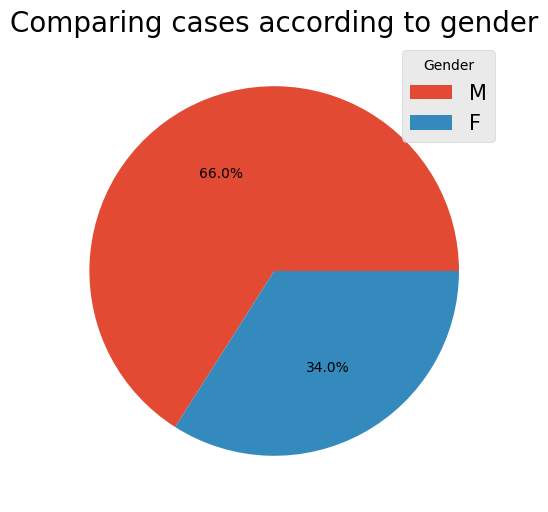

In [ ]:
from collections import Counter
gender=individual_details.gender
gender.dropna(inplace=True)
gender=gender.value_counts()
per=[]
for i in gender:
    perc=i/gender.sum()
    per.append(format(perc,'.2f'))
plt.figure(figsize=(10,6))
plt.title('Comparing cases according to gender',fontsize=20)
plt.pie(per,autopct='%1.1f%%')
plt.legend(gender.index,loc='best',title='Gender',fontsize=15)

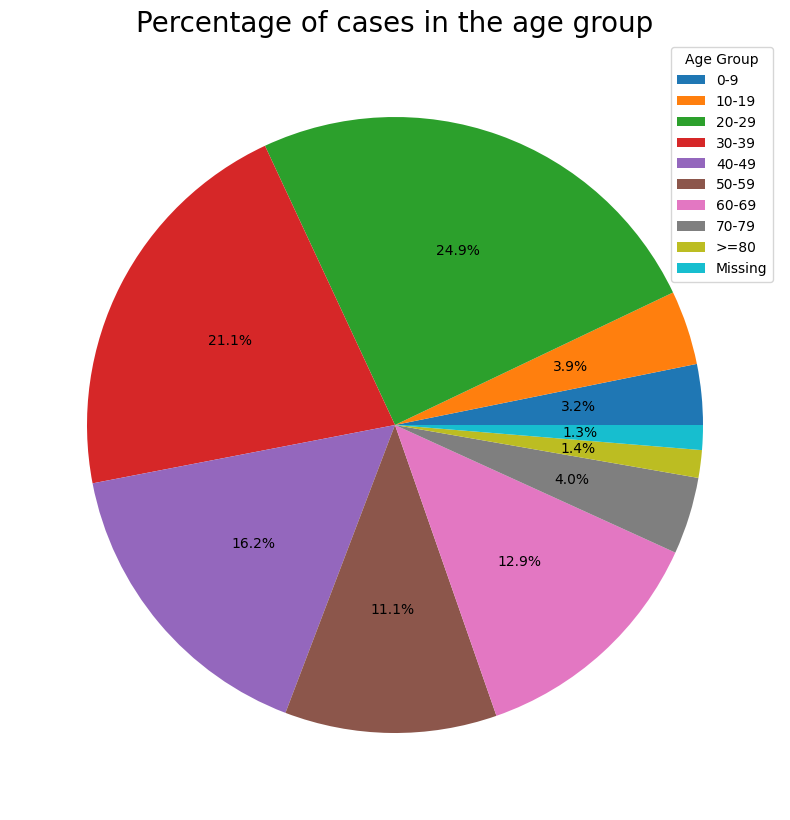

In [ ]:
perc=[]
for i in agegroup['Percentage']:
    per=float(re.findall("\d+\.\d+",i)[0])
    perc.append(per)
agegroup['Percentage']=perc
plt.figure(figsize=(20,10))
plt.title('Percentage of cases in the age group',fontsize=20)
plt.pie(agegroup['Percentage'],autopct='%1.1f%%')
plt.legend(agegroup['AgeGroup'],loc='best',title='Age Group')

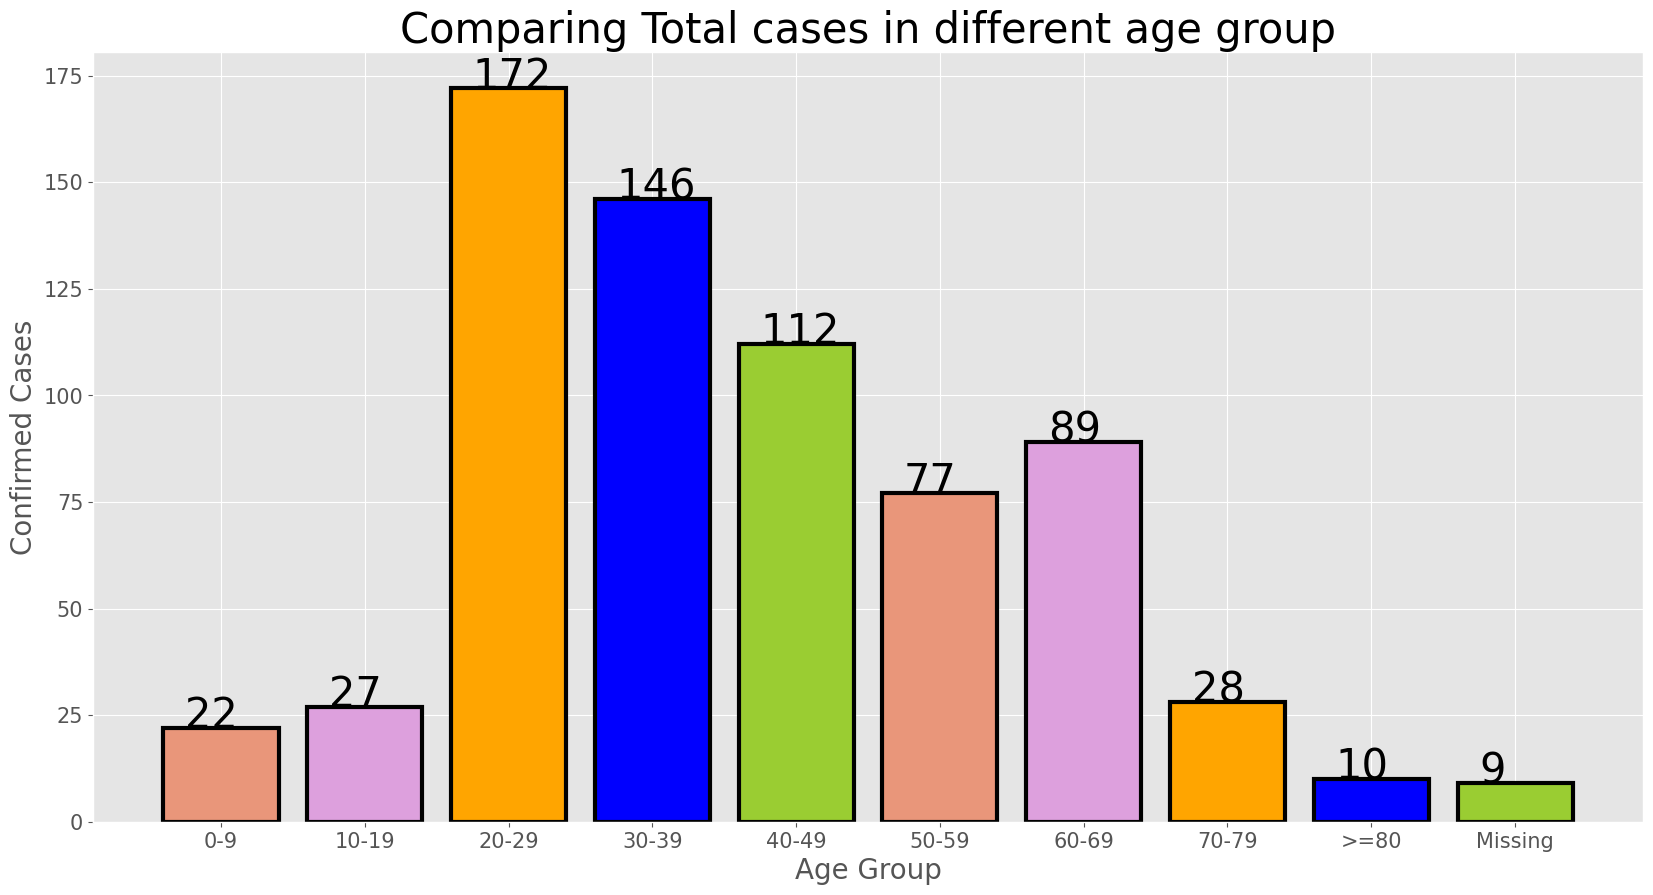

In [ ]:
plt.figure(figsize=(20,10))
plt.style.use('ggplot')
plt.title('Comparing Total cases in different age group',fontsize=30)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Age Group',fontsize=20)
plt.ylabel('Confirmed Cases',fontsize=20)
plt.bar(agegroup['AgeGroup'],agegroup['TotalCases'],color=['darksalmon','plum','orange','blue','yellowgreen'],edgecolor='black',linewidth=3)
for i, v in enumerate(agegroup['TotalCases']):
    plt.text(i-.25, v,
              agegroup['TotalCases'][i],
              fontsize=30 )

<BarContainer object of 20 artists>

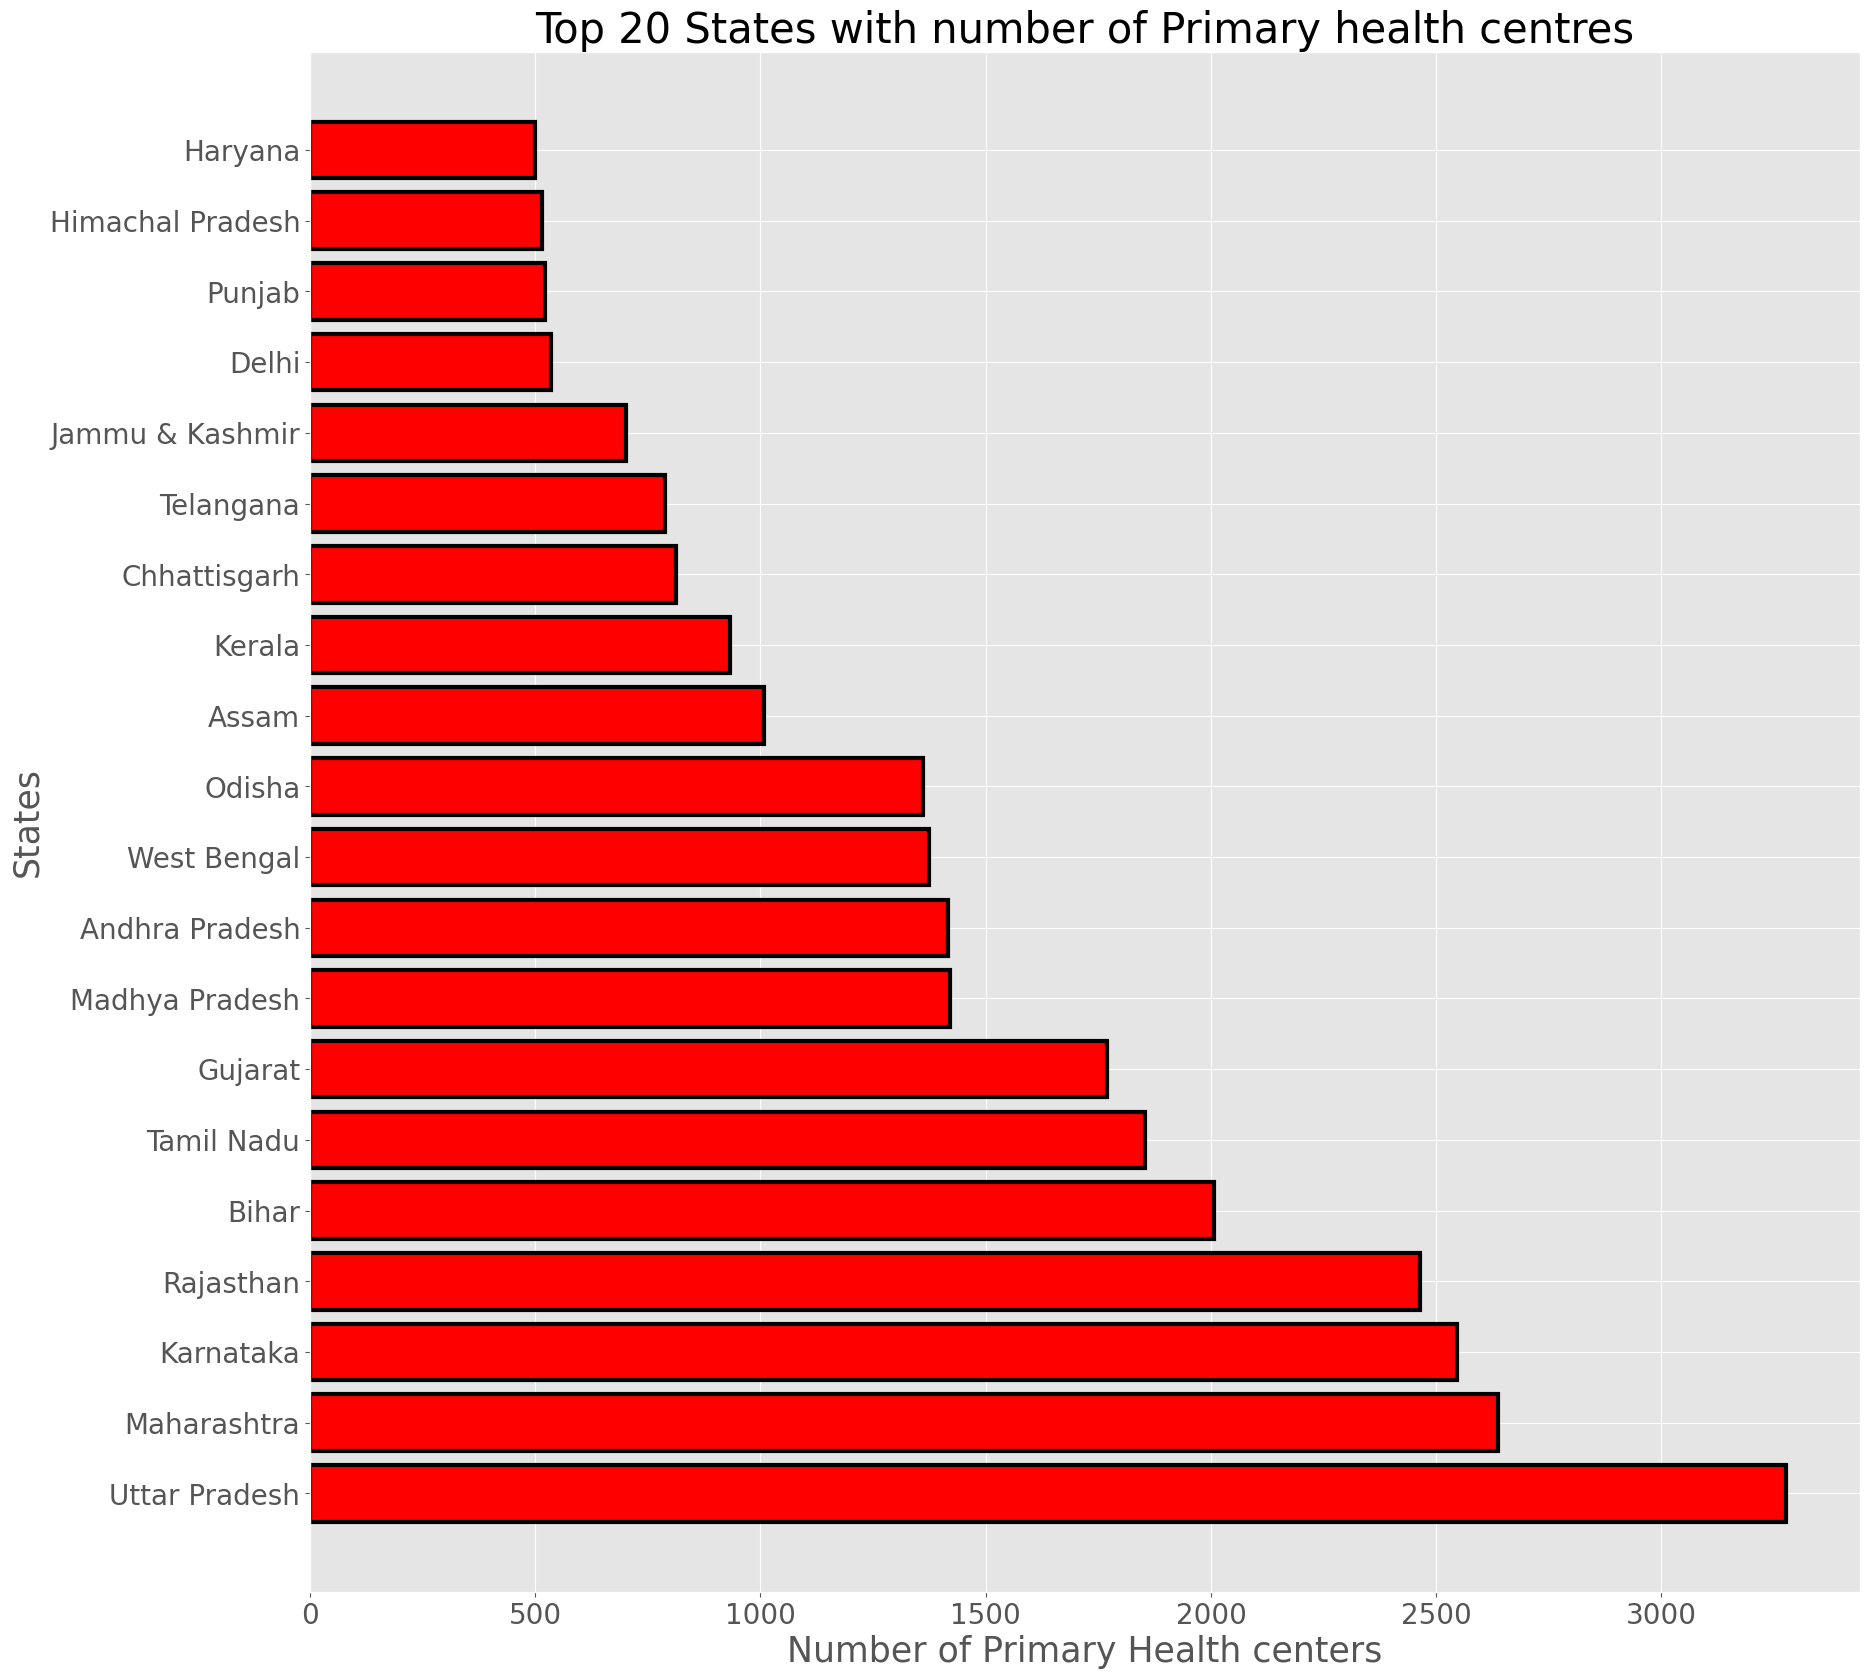

In [ ]:
top_20=hospital_beds.nlargest(20,'NumPrimaryHealthCenters_HMIS')

plt.figure(figsize=(20,20))
plt.title('Top 20 States with number of Primary health centres',fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Number of Primary Health centers',fontsize=25)
plt.ylabel('States',fontsize=25)
plt.barh(top_20['State/UT'],top_20['NumPrimaryHealthCenters_HMIS'],color='red',edgecolor='black',linewidth=3)

<BarContainer object of 20 artists>

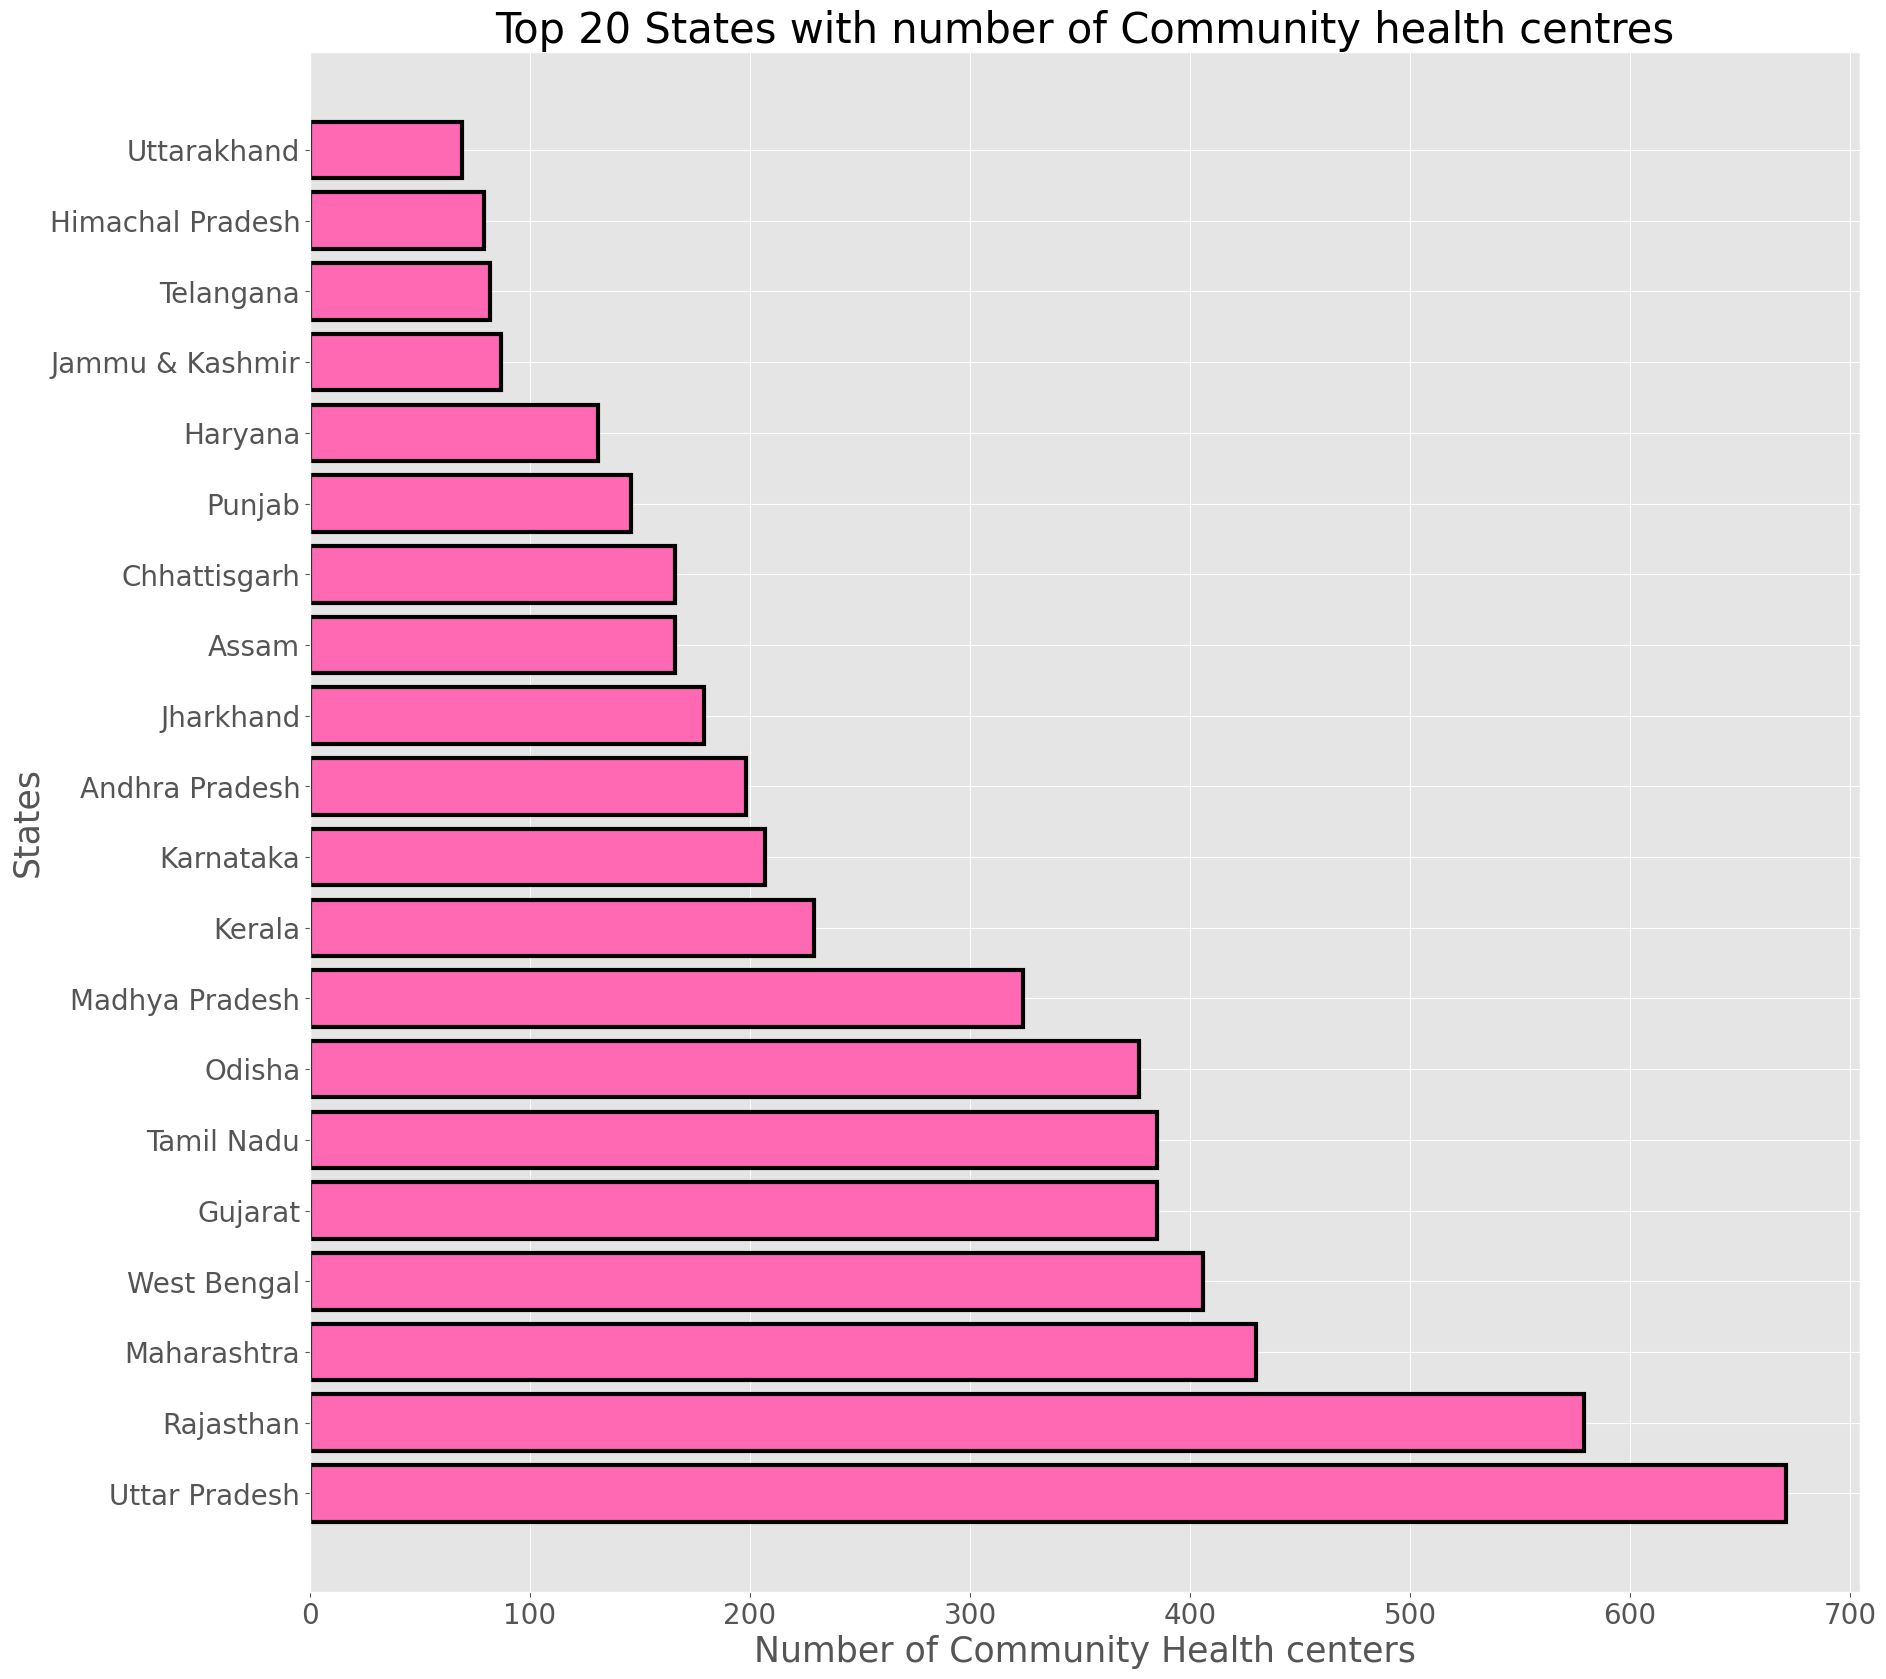

In [ ]:
top_20=hospital_beds.nlargest(20,'NumCommunityHealthCenters_HMIS')

plt.figure(figsize=(20,20))
plt.title('Top 20 States with number of Community health centres',fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Number of Community Health centers',fontsize=25)
plt.ylabel('States',fontsize=25)
plt.barh(top_20['State/UT'],top_20['NumCommunityHealthCenters_HMIS'],color='hotpink',edgecolor='black',linewidth=3)

<BarContainer object of 20 artists>

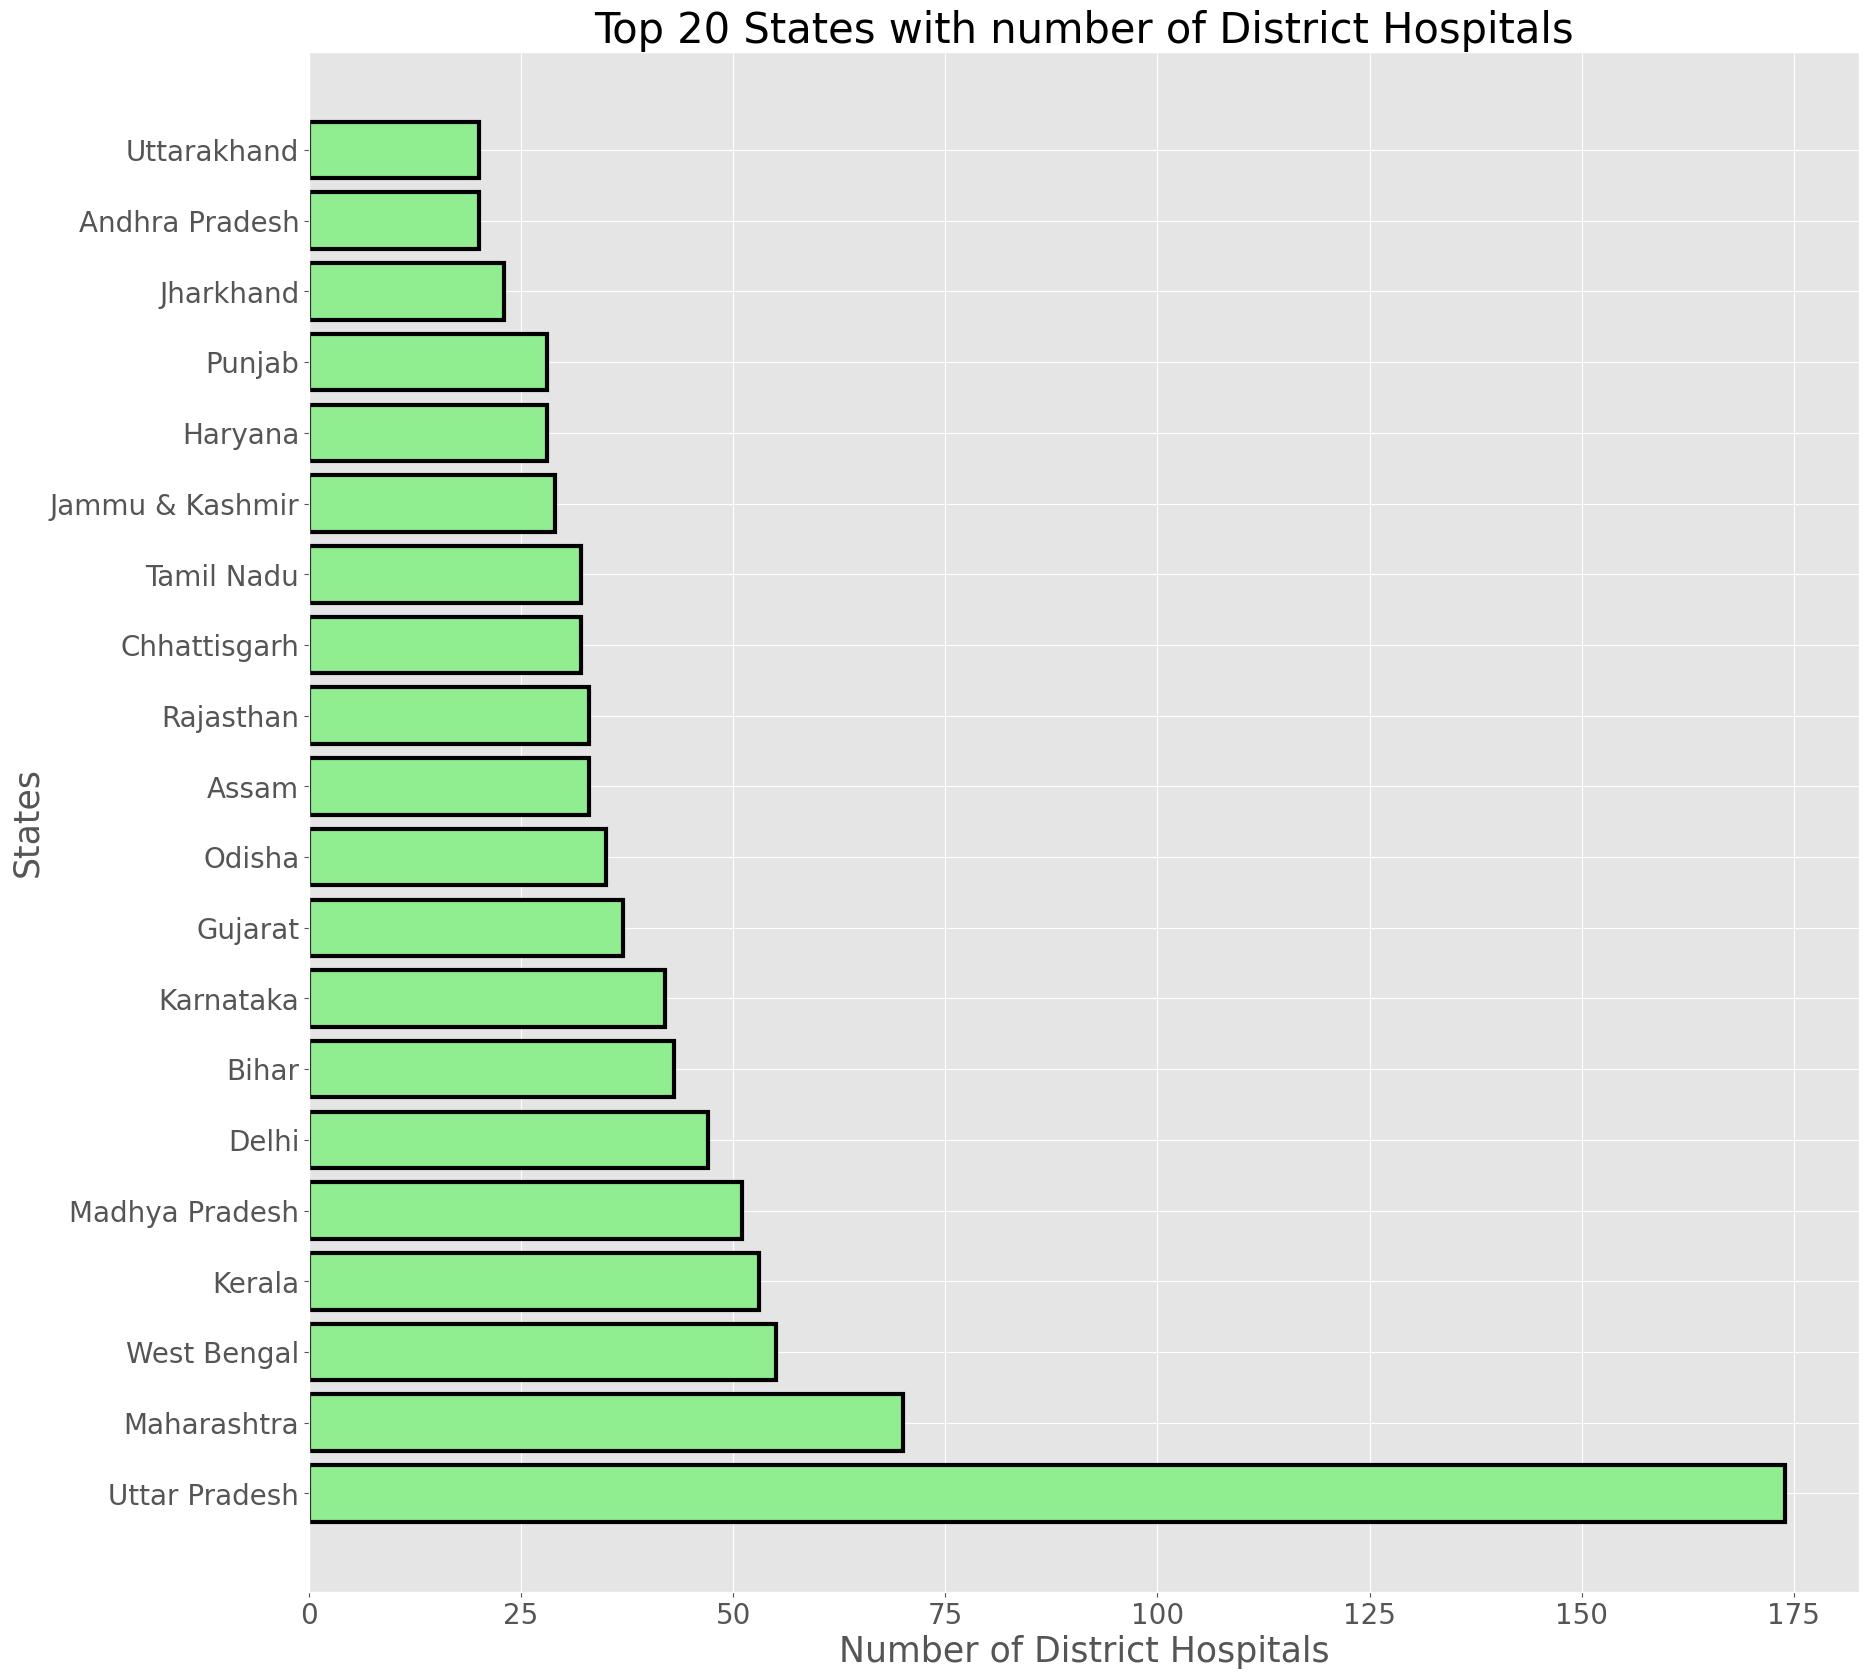

In [ ]:
top_20=hospital_beds.nlargest(20,'NumDistrictHospitals_HMIS')

plt.figure(figsize=(20,20))
plt.title('Top 20 States with number of District Hospitals',fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Number of District Hospitals',fontsize=25)
plt.ylabel('States',fontsize=25)
plt.barh(top_20['State/UT'],top_20['NumDistrictHospitals_HMIS'],color='lightgreen',edgecolor='black',linewidth=3)

<BarContainer object of 20 artists>

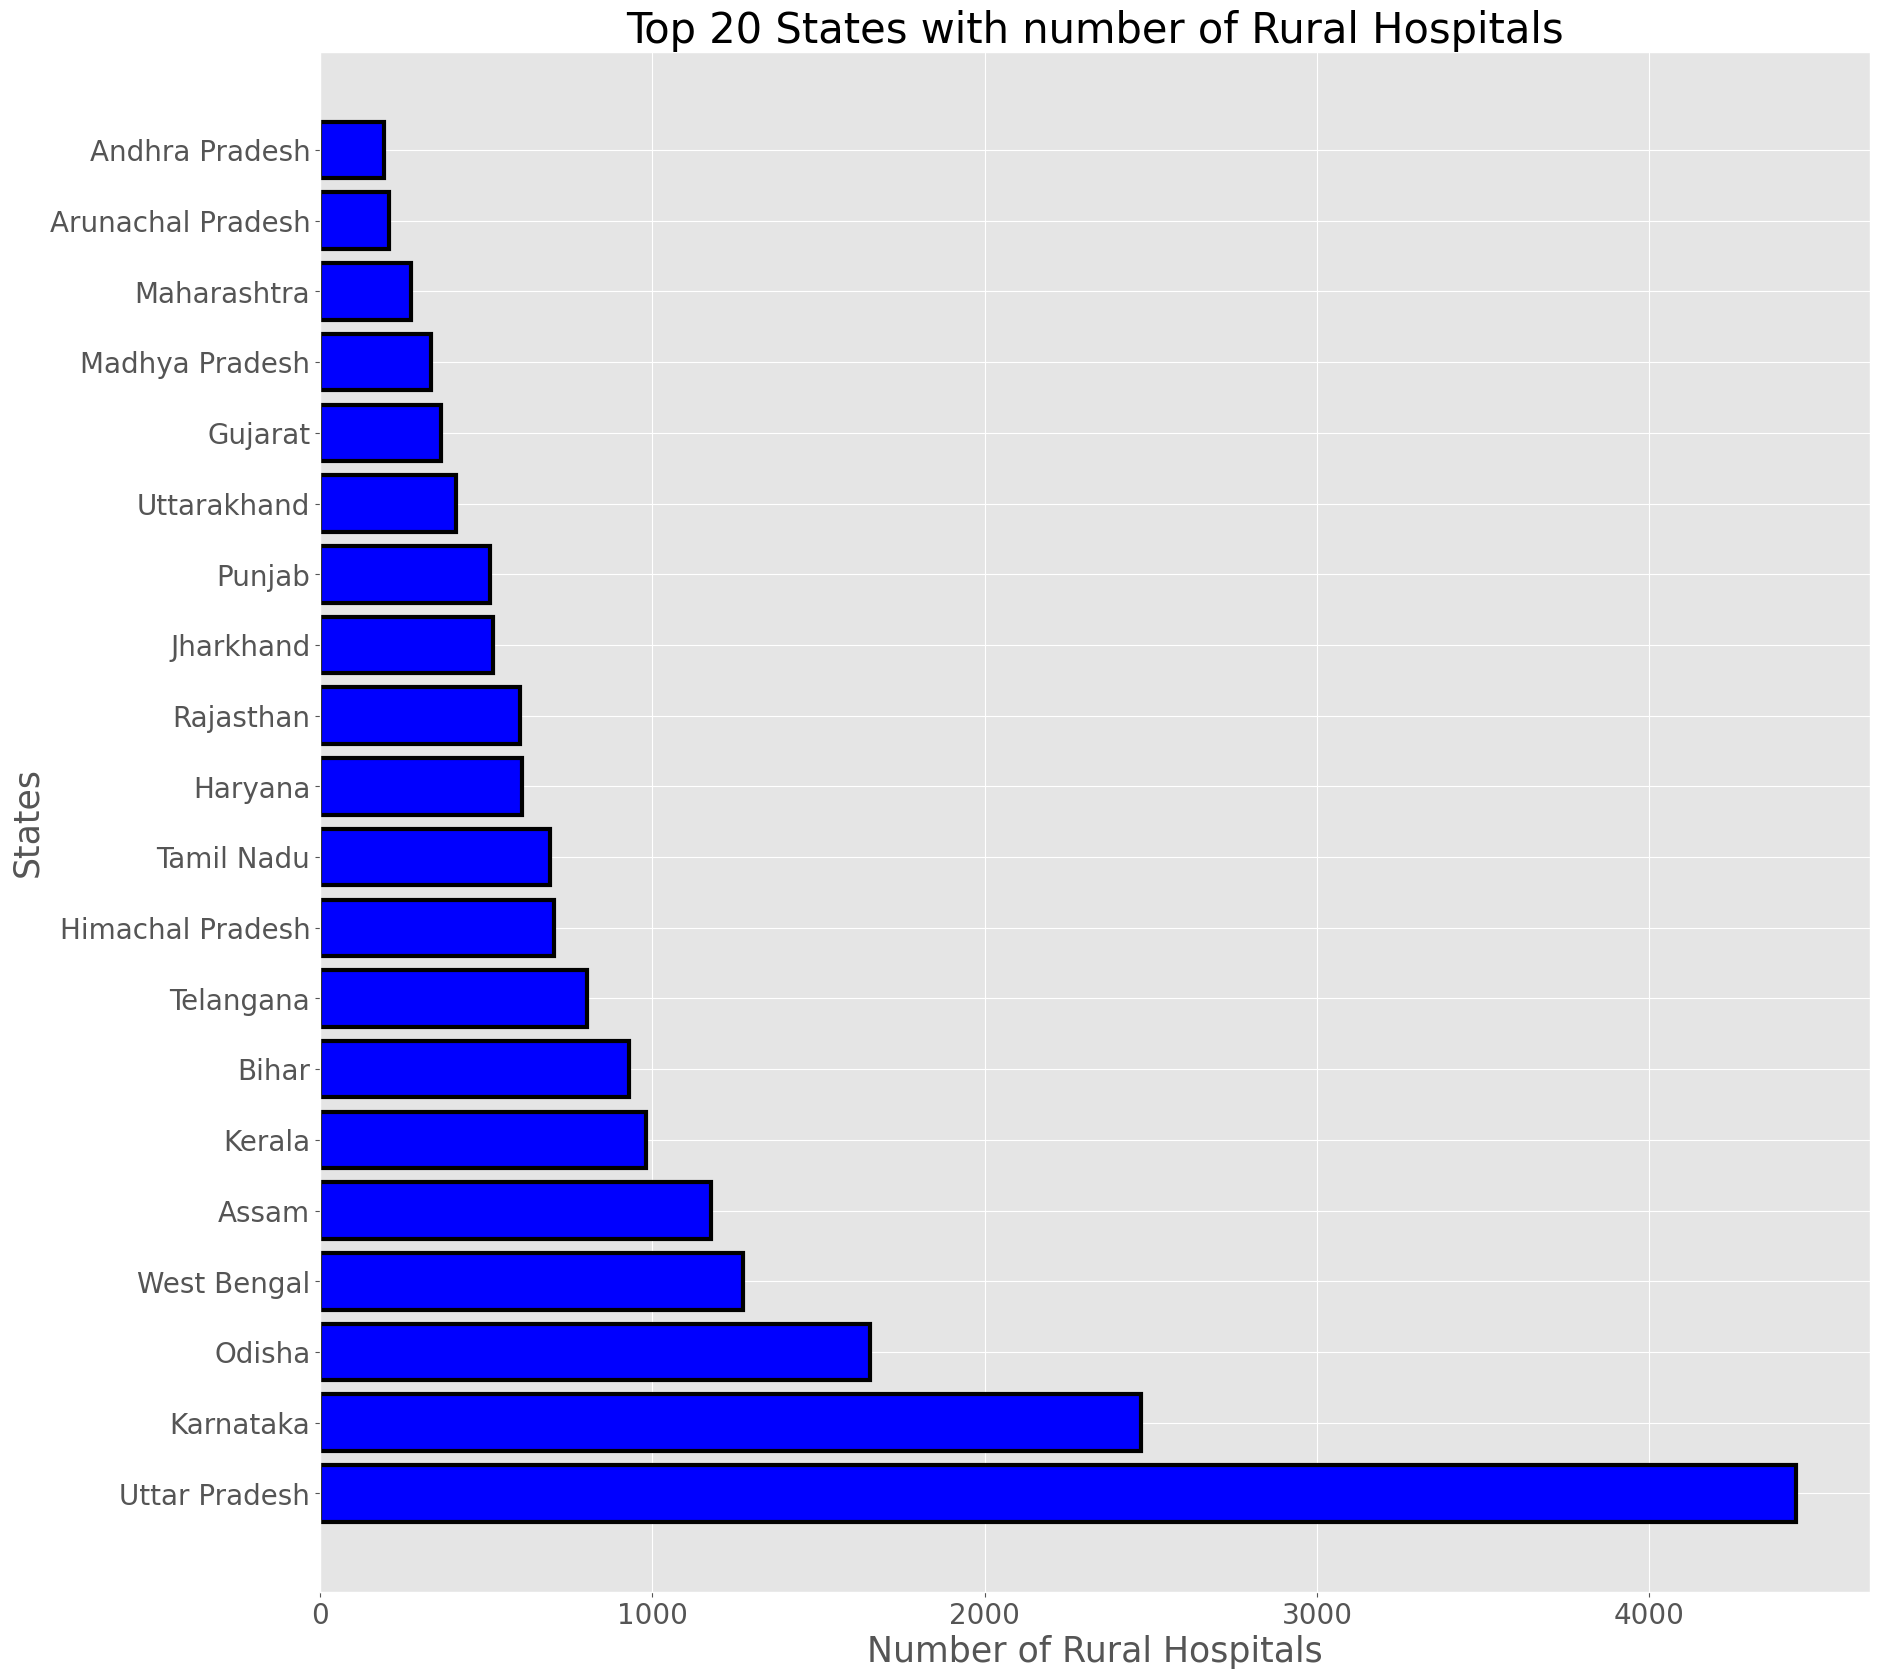

In [ ]:
top_20=hospital_beds.nlargest(20,'NumRuralHospitals_NHP18')

plt.figure(figsize=(20,20))
plt.title('Top 20 States with number of Rural Hospitals',fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Number of Rural Hospitals',fontsize=25)
plt.ylabel('States',fontsize=25)
plt.barh(top_20['State/UT'],top_20['NumRuralHospitals_NHP18'],color='blue',edgecolor='black',linewidth=3)

<BarContainer object of 20 artists>

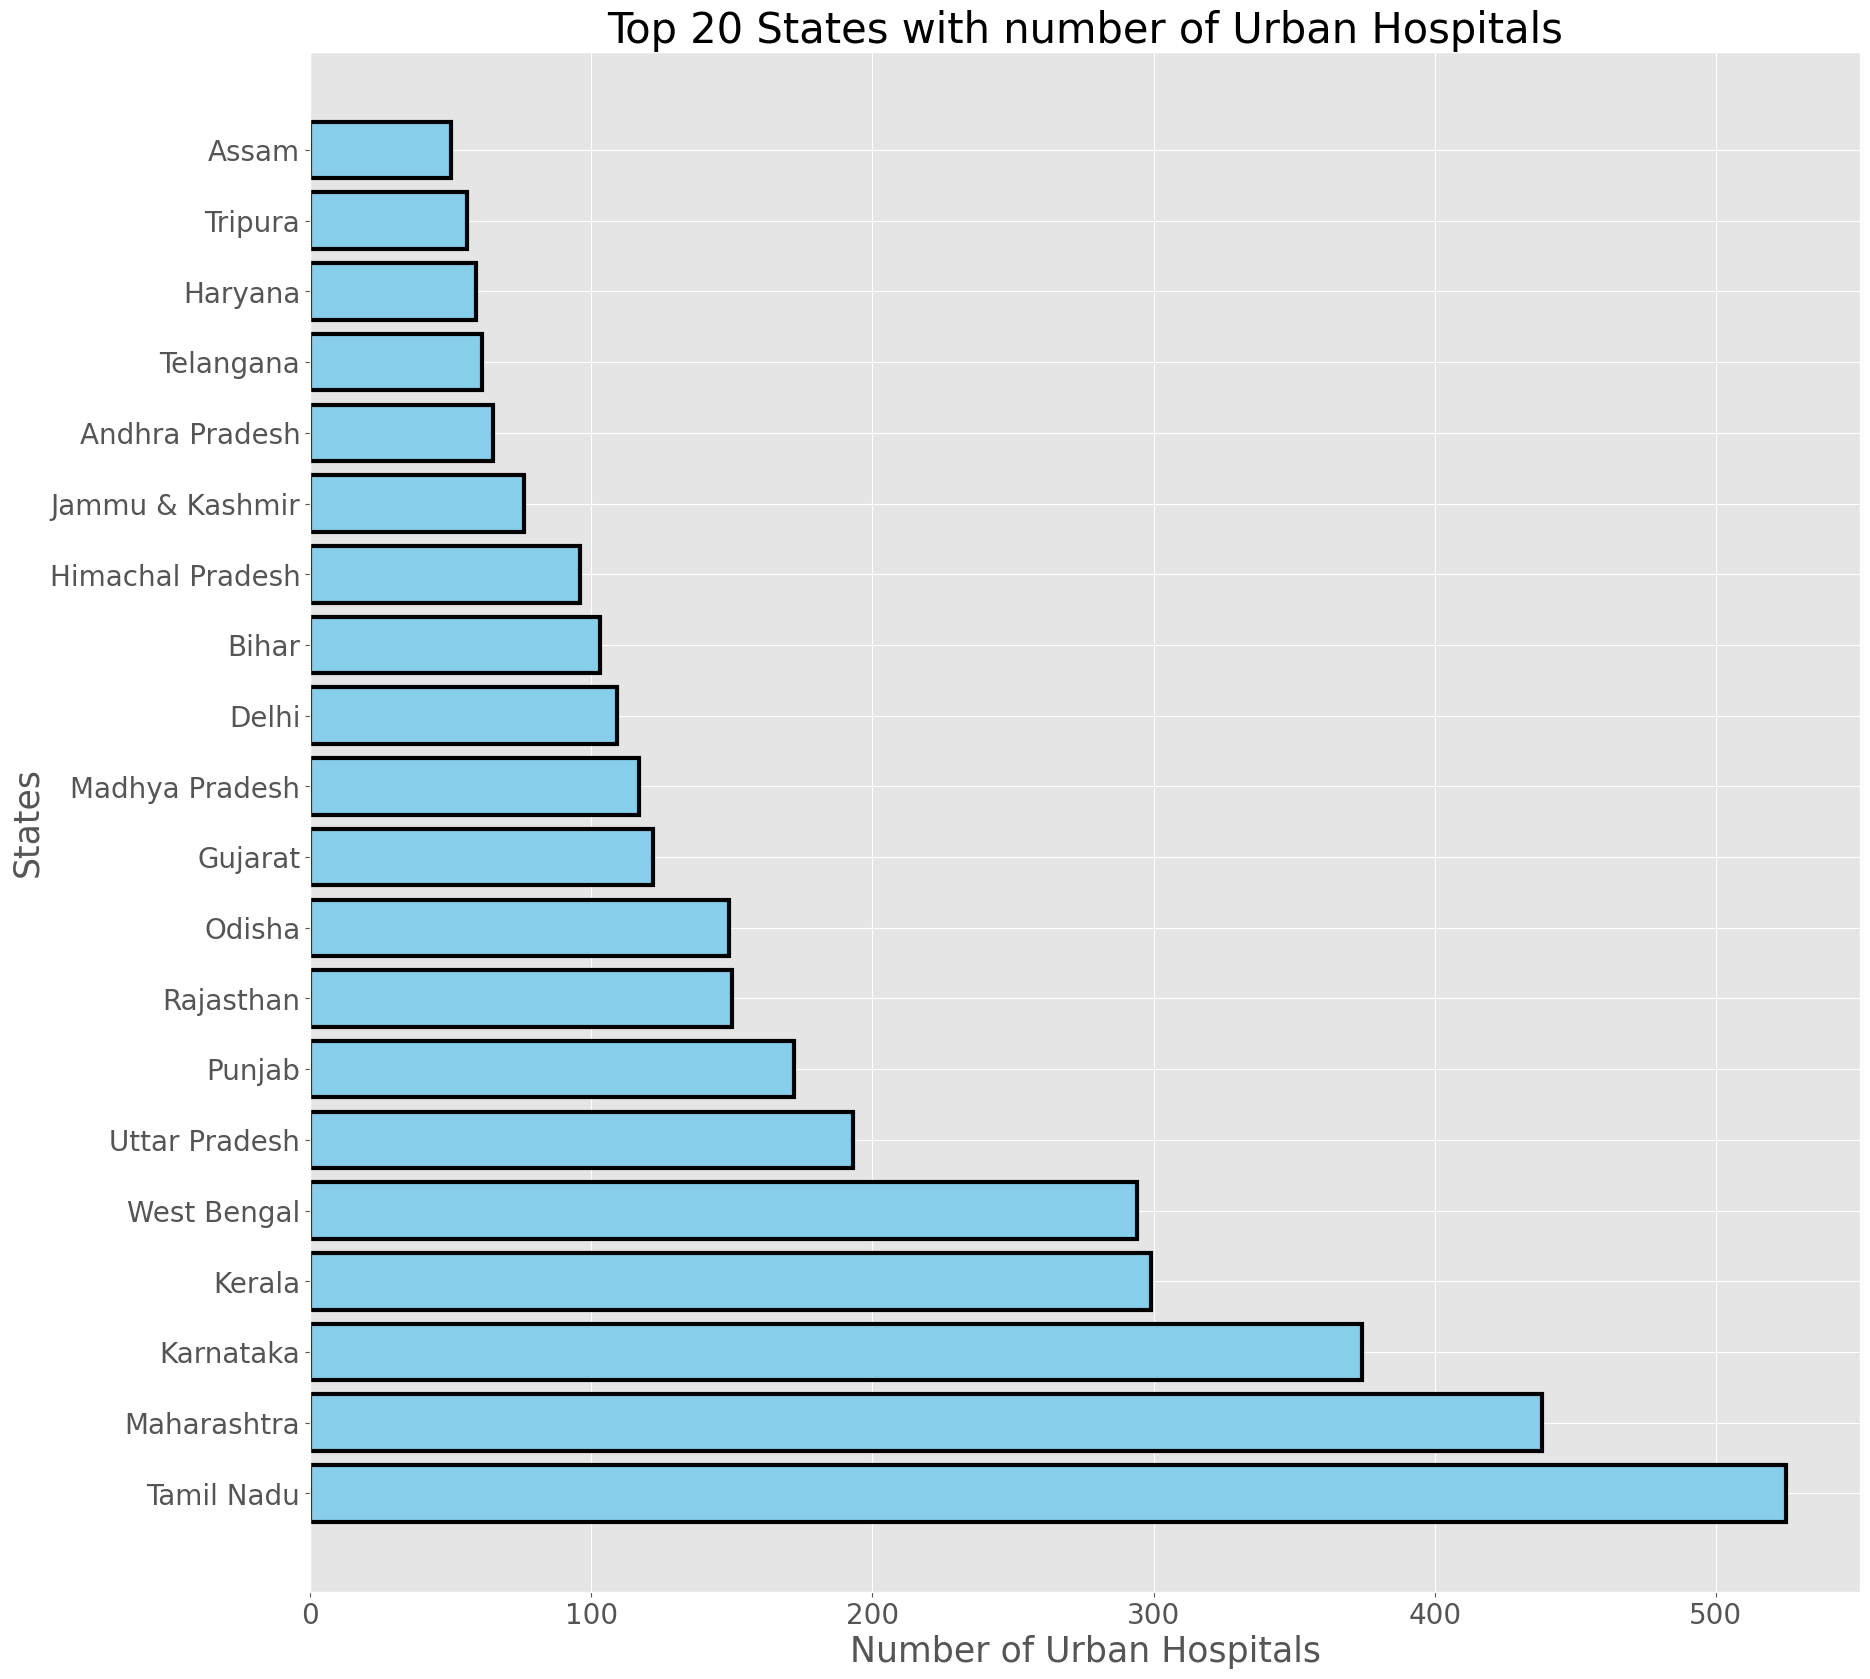

In [ ]:
top_20=hospital_beds.nlargest(20,'NumUrbanHospitals_NHP18')

plt.figure(figsize=(20,20))
plt.title('Top 20 States with number of Urban Hospitals',fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Number of Urban Hospitals',fontsize=25)
plt.ylabel('States',fontsize=25)
plt.barh(top_20['State/UT'],top_20['NumUrbanHospitals_NHP18'],color='skyblue',edgecolor='black',linewidth=3)

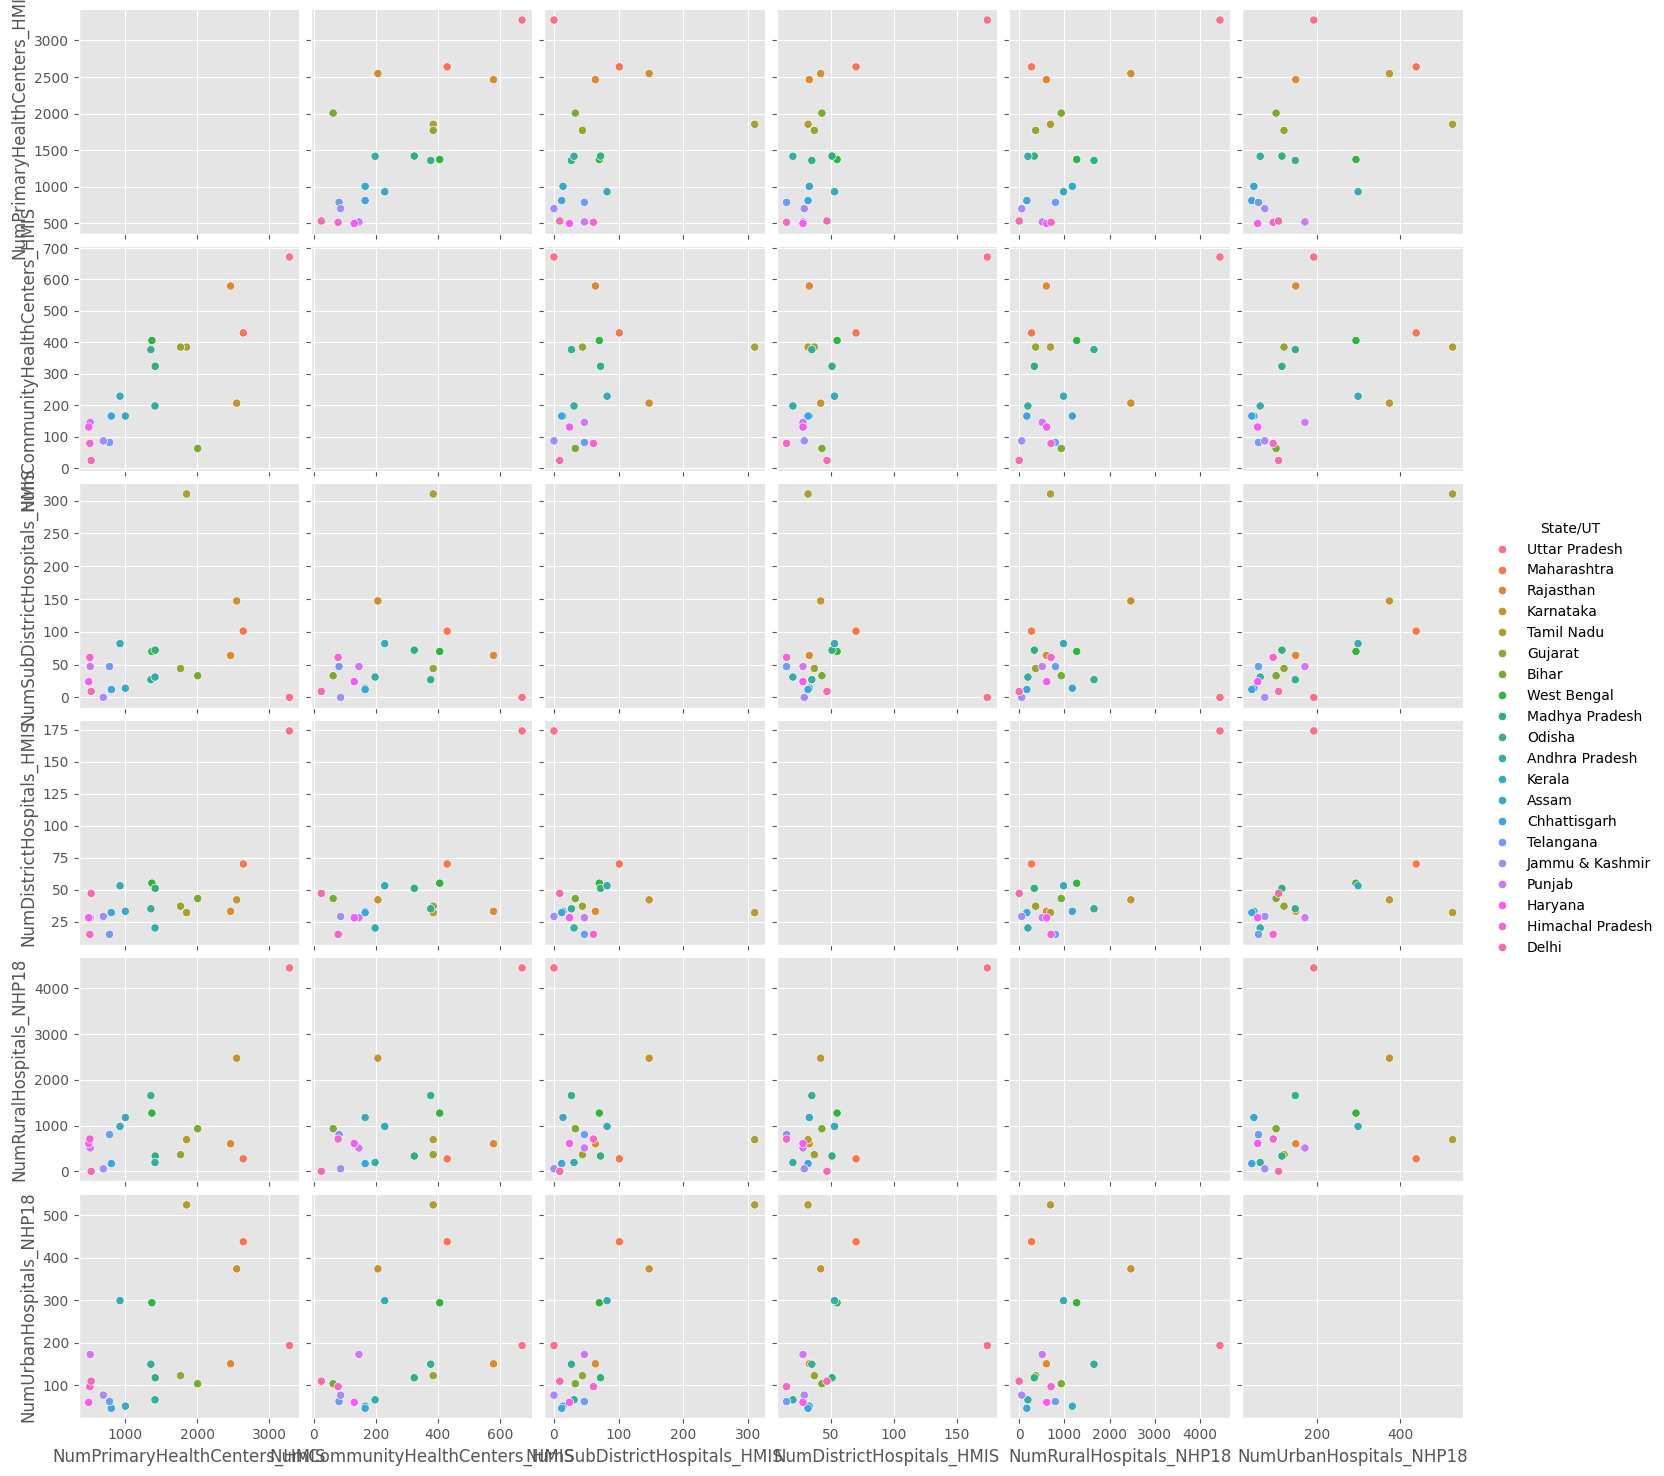

In [ ]:
top_20=hospital_beds.nlargest(20,'TotalPublicHealthFacilities_HMIS')
top_20=top_20[['State/UT','NumPrimaryHealthCenters_HMIS','NumCommunityHealthCenters_HMIS'
                    ,'NumSubDistrictHospitals_HMIS','NumDistrictHospitals_HMIS'
                    ,'NumRuralHospitals_NHP18' ,'NumUrbanHospitals_NHP18']]
sns.pairplot(top_20,hue='State/UT')

In [ ]:
df1=covid_19_india.groupby('Date')[['Cured','Deaths','Confirmed']].sum()

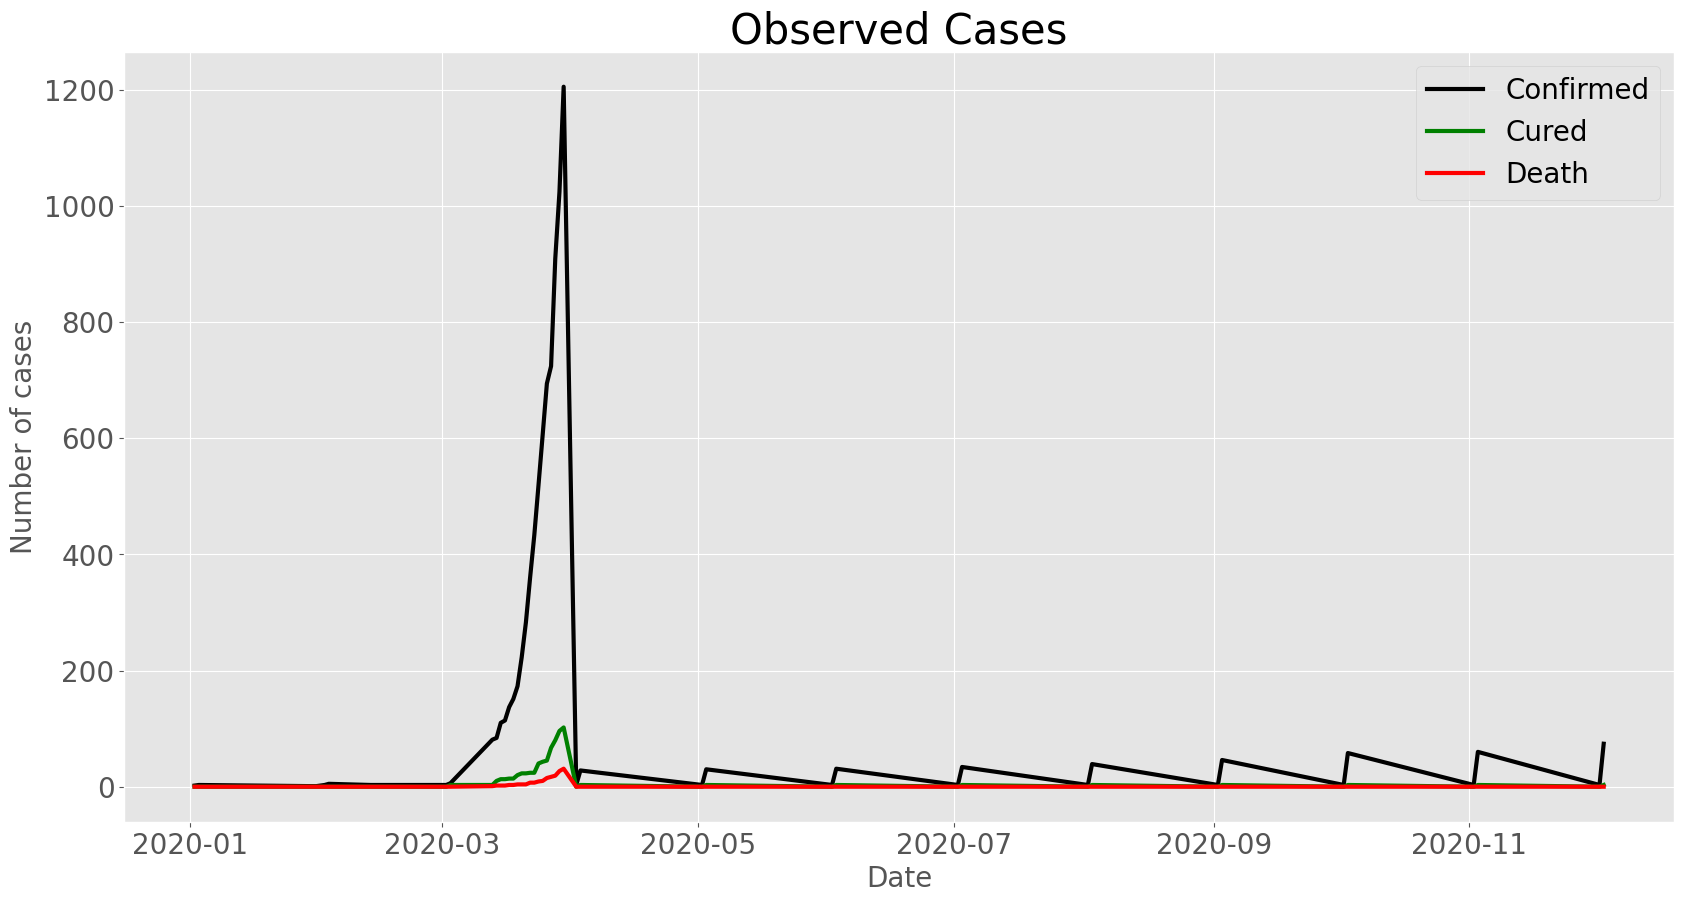

In [ ]:
plt.figure(figsize=(20,10))
plt.style.use('ggplot')
plt.title('Observed Cases',fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Date',fontsize=20)
plt.ylabel('Number of cases',fontsize=20)
plt.plot(df1.index,df1['Confirmed'],linewidth=3,label='Confirmed',color='black')
plt.plot(df1.index,df1['Cured'],linewidth=3,label='Cured',color='green')
plt.plot(df1.index,df1['Deaths'],linewidth=3,label='Death',color='red')
plt.legend(fontsize=20)

In [ ]:
df2=covid_19_india.groupby('State/UnionTerritory')[['Cured','Deaths','Confirmed']].sum()

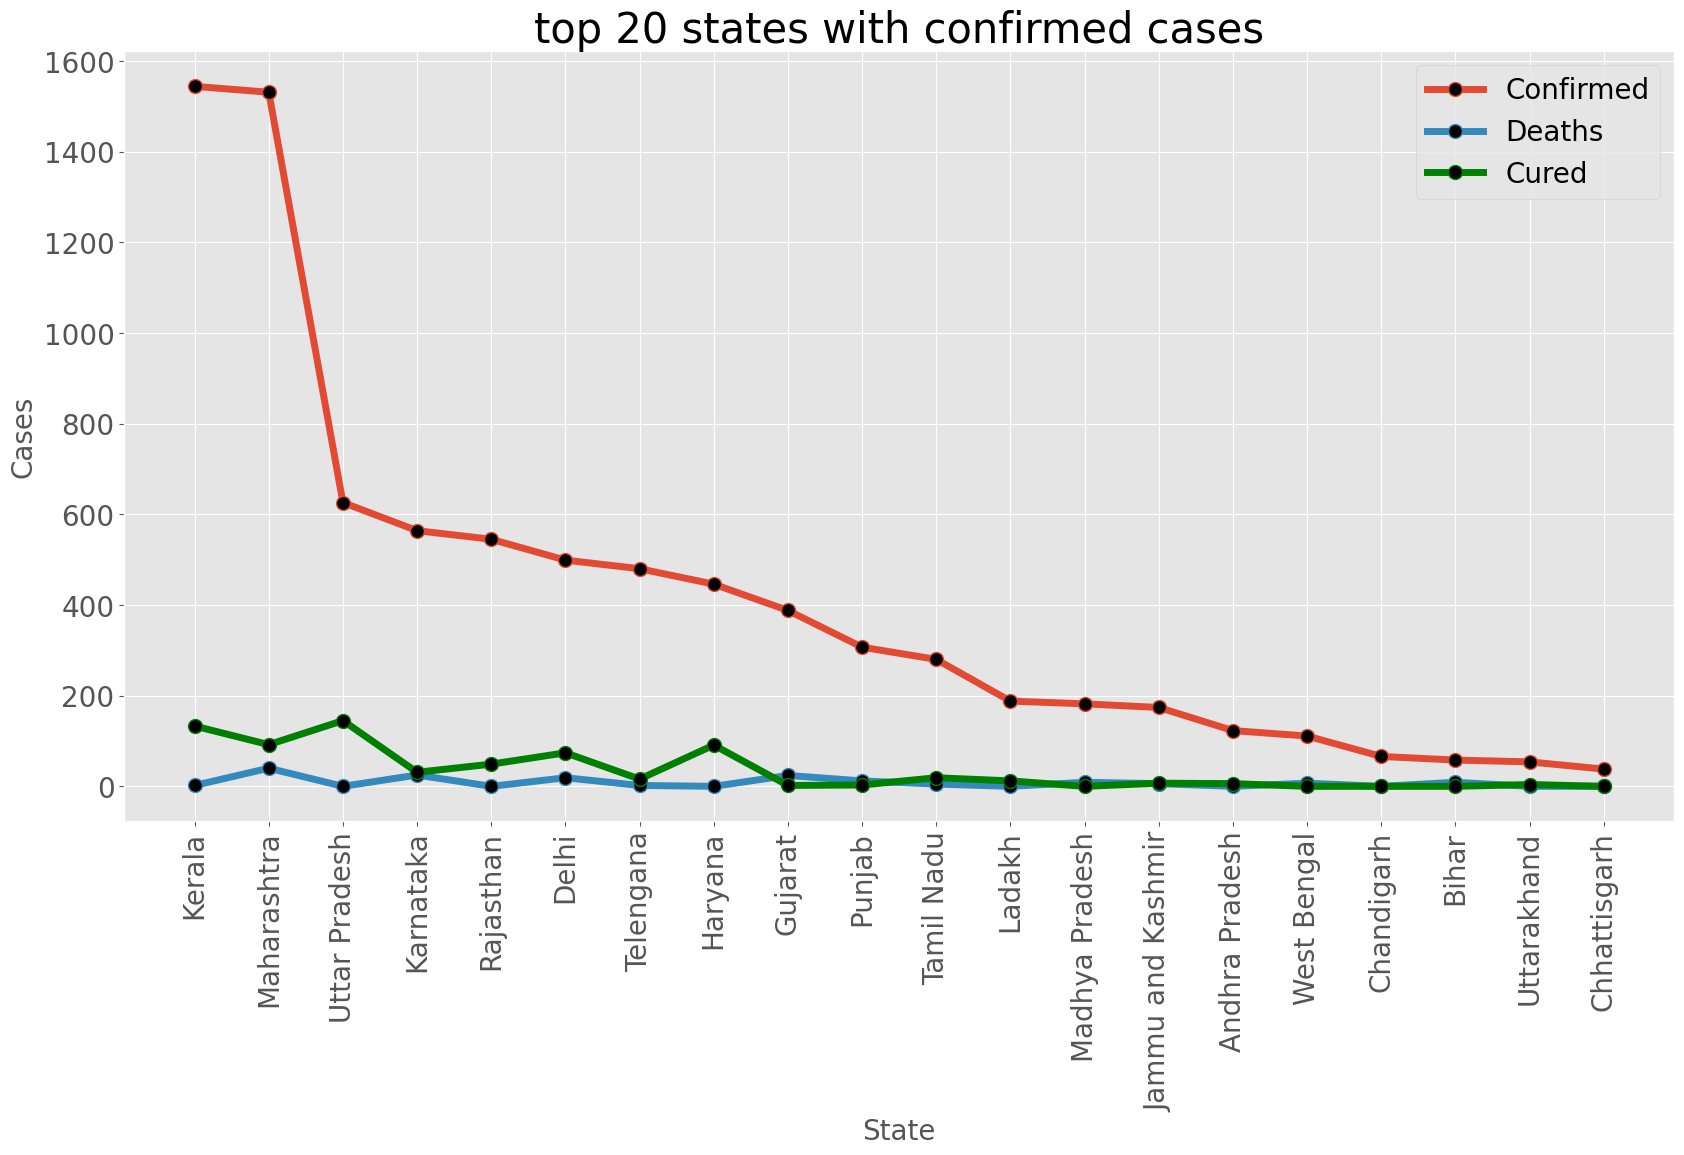

In [ ]:
df2=df2.nlargest(20,'Confirmed')
plt.figure(figsize=(20,10))
plt.title('top 20 states with confirmed cases',fontsize=30)
plt.xticks(rotation=90,fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('State',fontsize=20)
plt.ylabel('Cases',fontsize=20)
plt.plot(df2.index,df2.Confirmed,marker='o',mfc='black',label='Confirmed',markersize=10,linewidth=5)
plt.plot(df2.index,df2.Deaths,marker='o',mfc='black',label='Deaths',markersize=10,linewidth=5)
plt.plot(df2.index,df2.Cured,marker='o',mfc='black',label='Cured',markersize=10,linewidth=5,color='green')
plt.legend(fontsize=20)

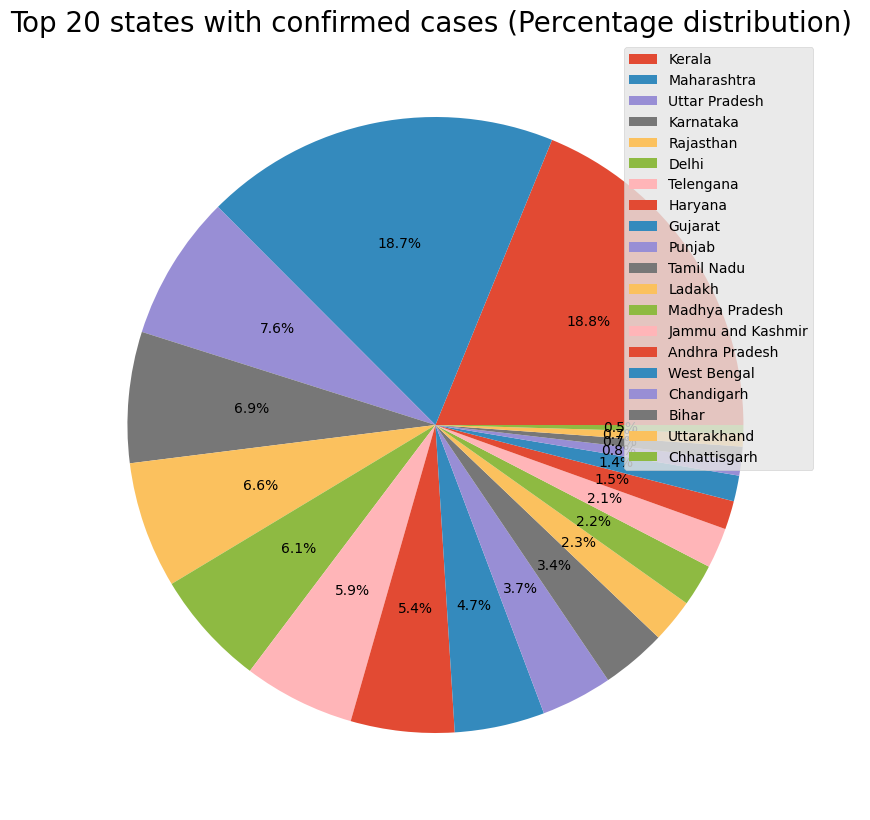

In [ ]:
perc=[]
for i in df2.Confirmed:
    per=i/len(df2)
    perc.append(i)
plt.figure(figsize=(25,10))
plt.title('Top 20 states with confirmed cases (Percentage distribution) ',fontsize=20)
plt.pie(perc,autopct='%1.1f%%')
plt.legend(df2.index,loc='upper right')

In [ ]:
covid_19_india['ConfirmedForeignNational'].replace('-',0,inplace=True)
covid_19_india['ConfirmedIndianNational'].replace('-',0,inplace=True)
covid_19_india['ConfirmedIndianNational']=covid_19_india['ConfirmedIndianNational'].astype('int64')
covid_19_india['ConfirmedForeignNational']=covid_19_india['ConfirmedForeignNational'].astype('int64')

In [ ]:
df3=covid_19_india.groupby('State/UnionTerritory')[['ConfirmedIndianNational','ConfirmedForeignNational']].sum()

In [ ]:
df4=df3.nlargest(20,'ConfirmedIndianNational')
df5=df3.nlargest(20,'ConfirmedForeignNational')

<BarContainer object of 20 artists>

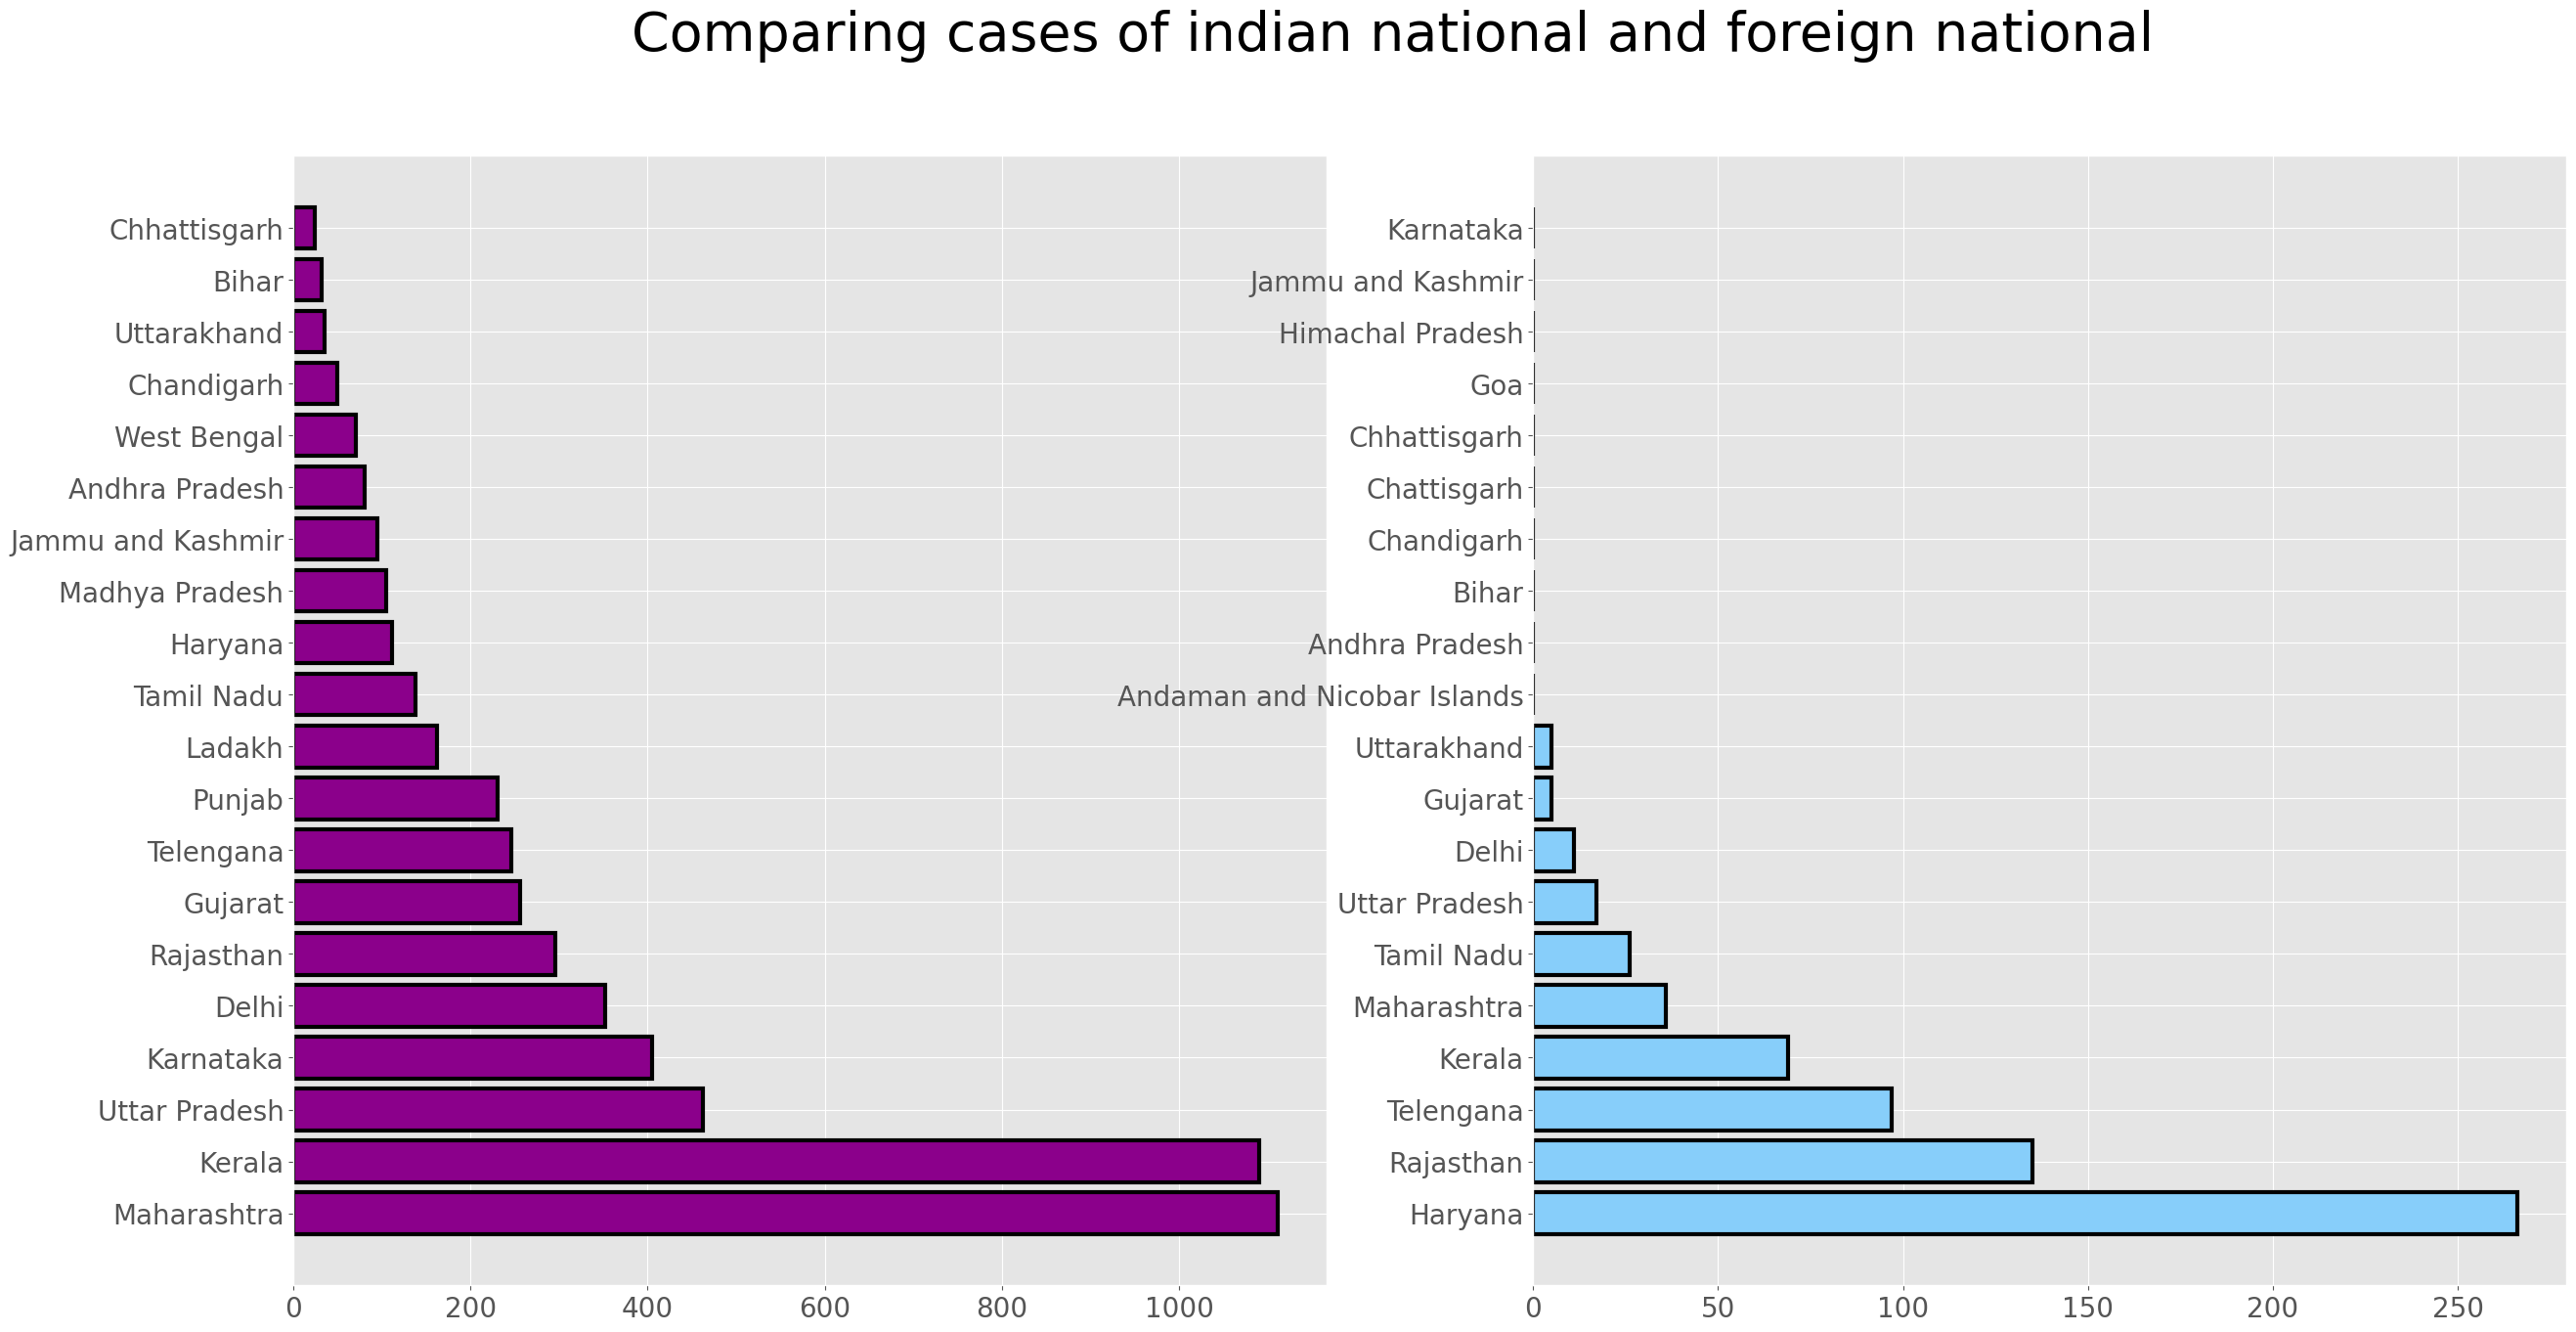

In [ ]:
plt.figure(figsize=(30,15))
plt.suptitle('Comparing cases of indian national and foreign national',fontsize=40)
plt.subplot(121)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.barh(df4.index,df4.ConfirmedIndianNational,color='darkmagenta',edgecolor='black',linewidth=3)
plt.subplot(122)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.barh(df5.index,df5.ConfirmedForeignNational,color='lightskyblue',edgecolor='black',linewidth=3)

<BarContainer object of 20 artists>

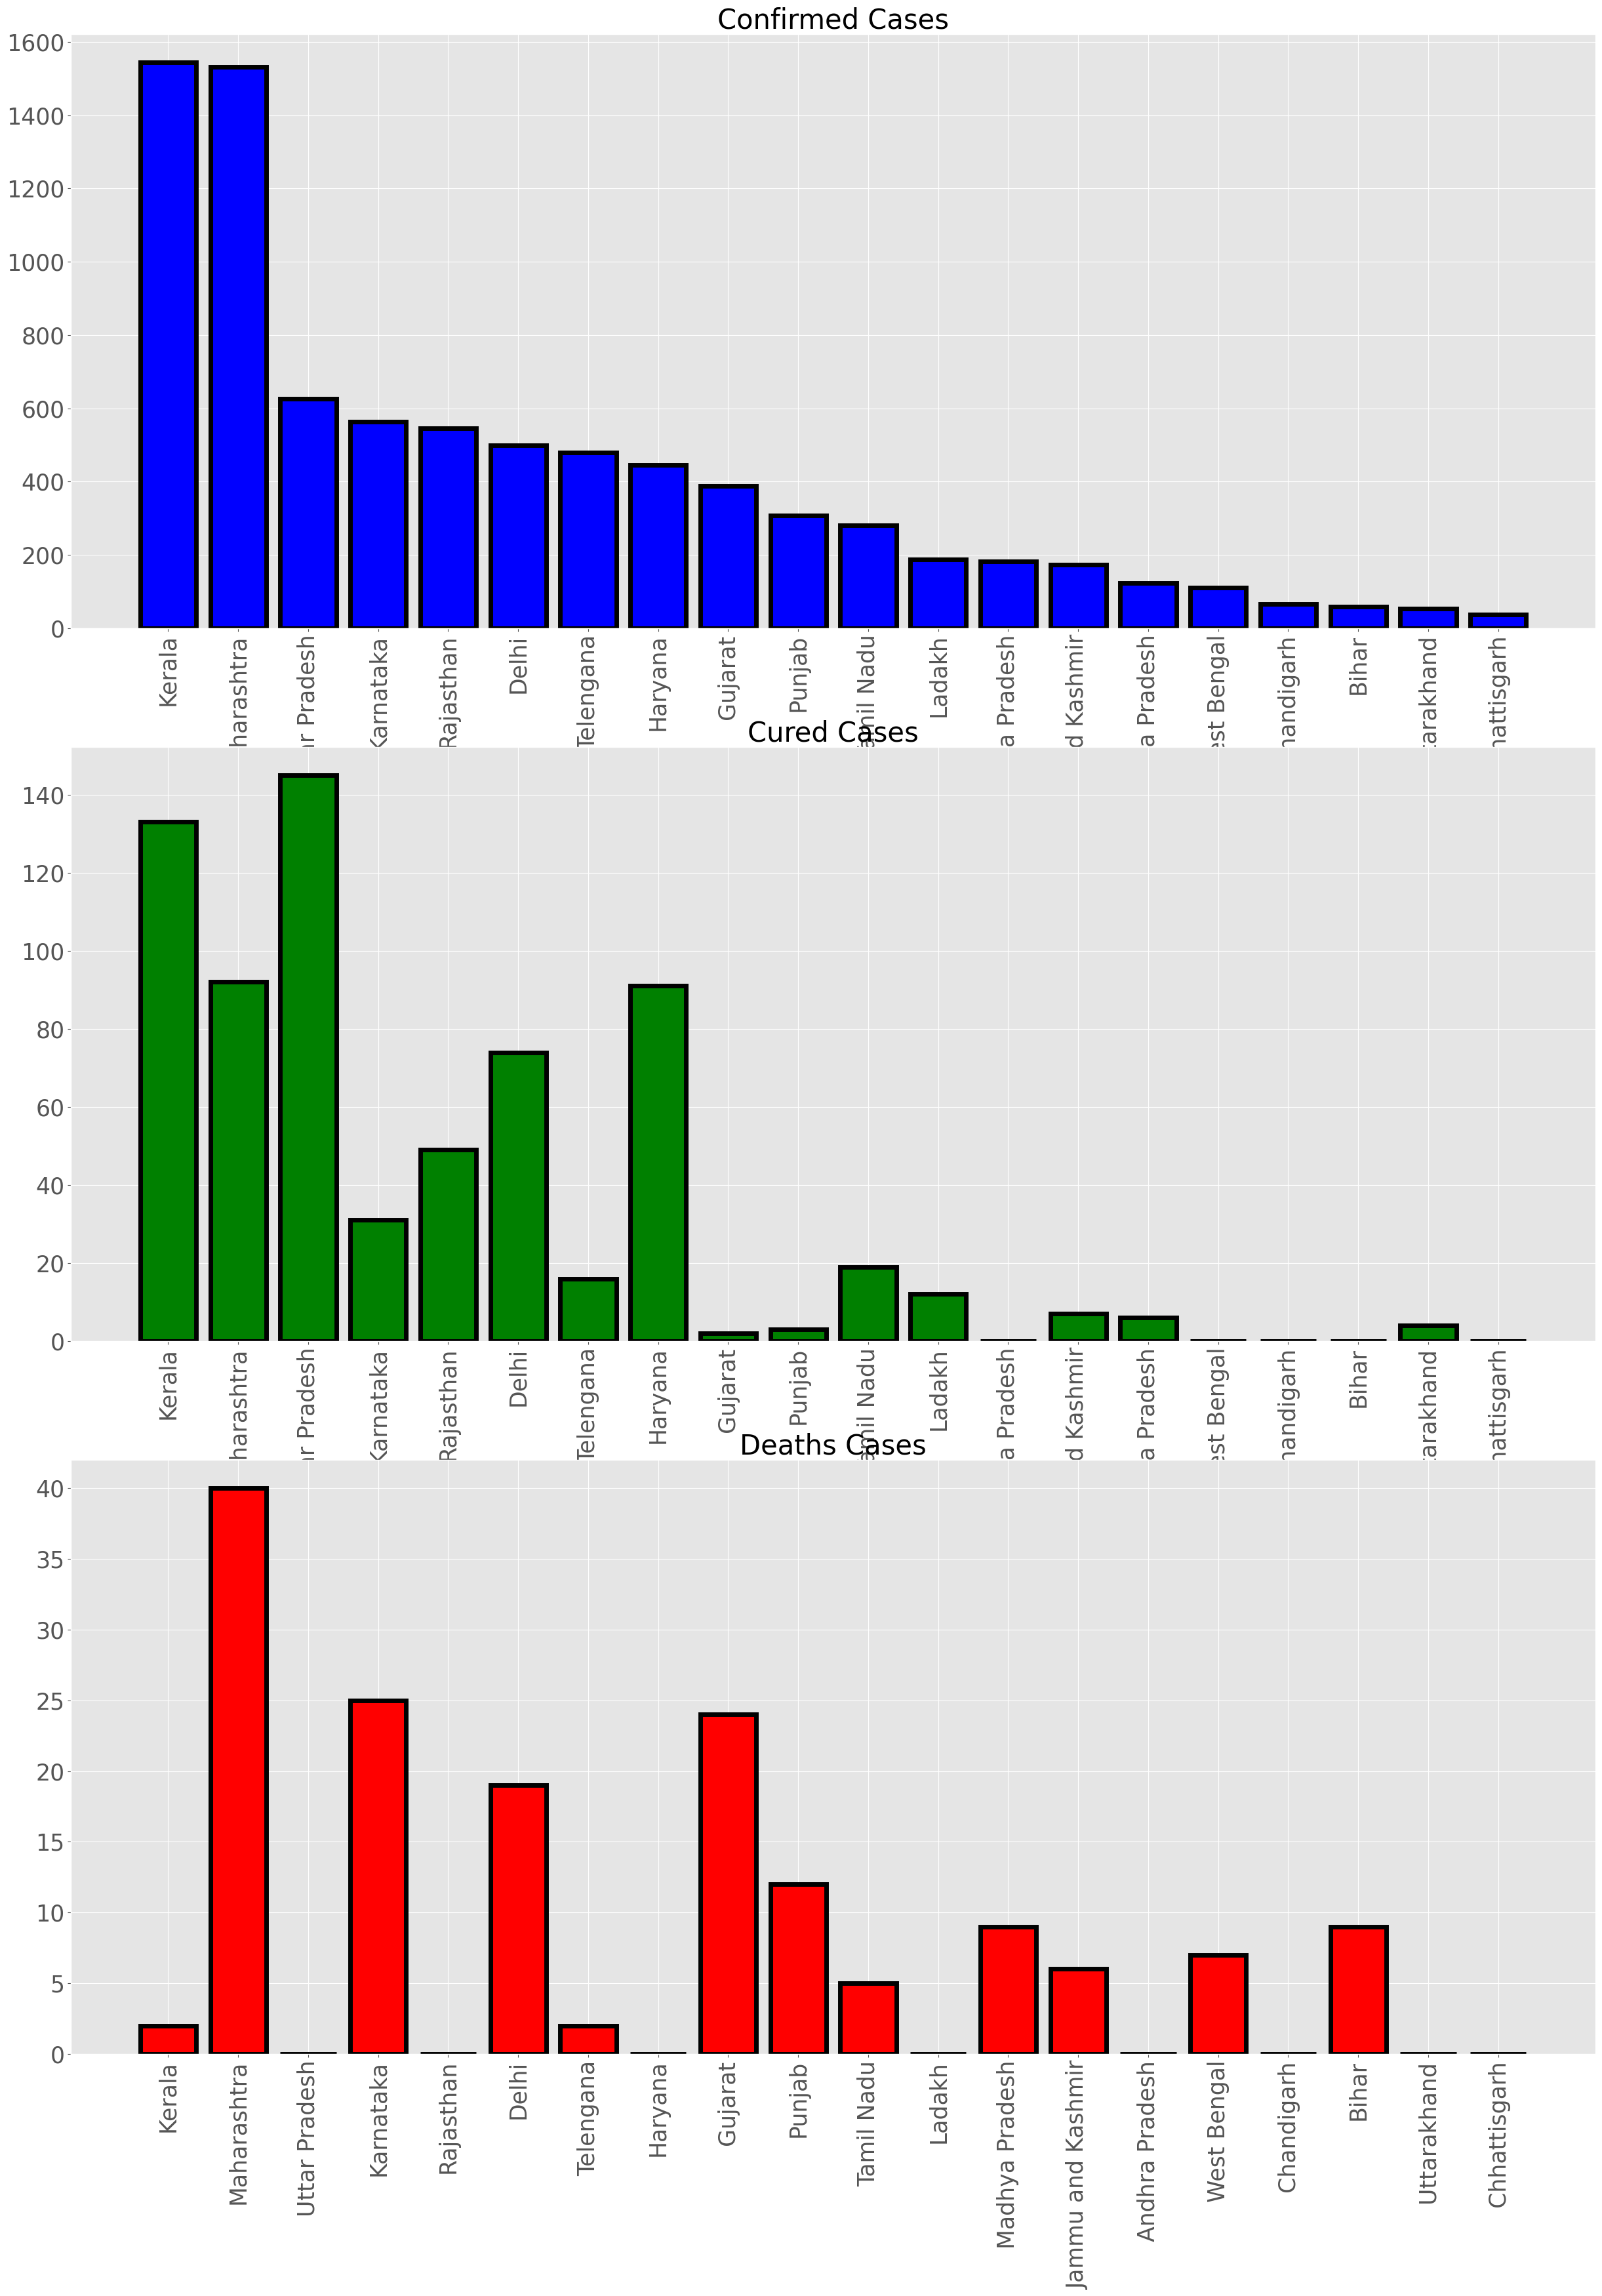

In [ ]:
plt.figure(figsize=(30,40))
plt.subplot(311)
plt.title('Confirmed Cases',fontsize=30)
plt.xticks(rotation=90,fontsize=25)
plt.yticks(fontsize=25)
plt.bar(df2.index,df2.Confirmed,color='blue',linewidth=5,edgecolor='black')
plt.subplot(312)
plt.title('Cured Cases',fontsize=30)
plt.xticks(rotation=90,fontsize=25)
plt.yticks(fontsize=25)
plt.bar(df2.index,df2.Cured,color='green',linewidth=5,edgecolor='black')
plt.subplot(313)
plt.title('Deaths Cases',fontsize=30)
plt.xticks(rotation=90,fontsize=25)
plt.yticks(fontsize=25)
plt.bar(df2.index,df2.Deaths,color='red',linewidth=5,edgecolor='black')

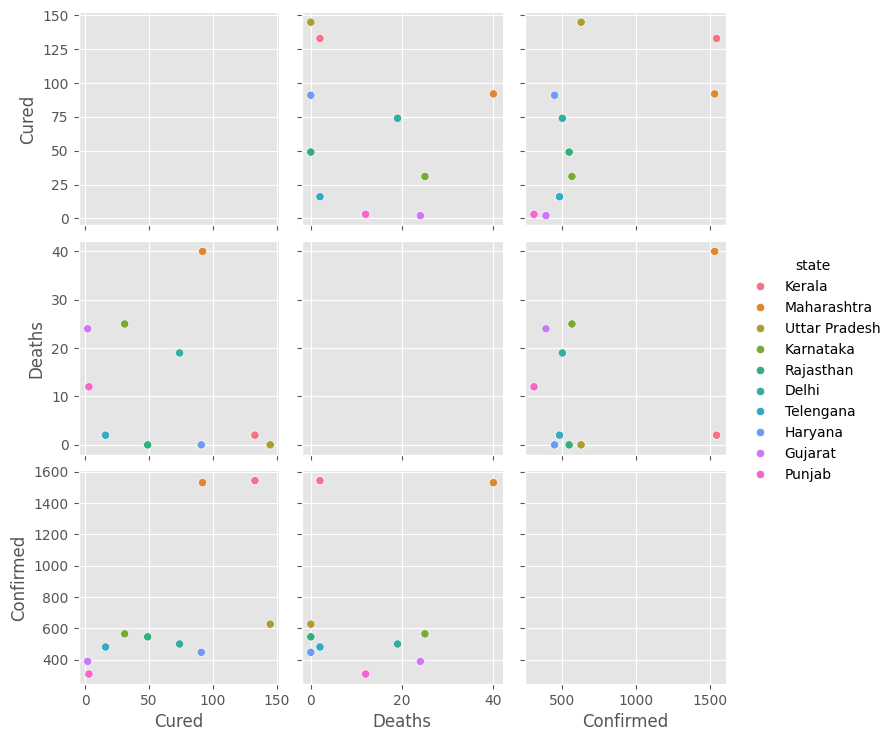

In [ ]:
df2=df2.nlargest(10,'Confirmed')
df2['state']=df2.index
sns.pairplot(df2,hue='state')

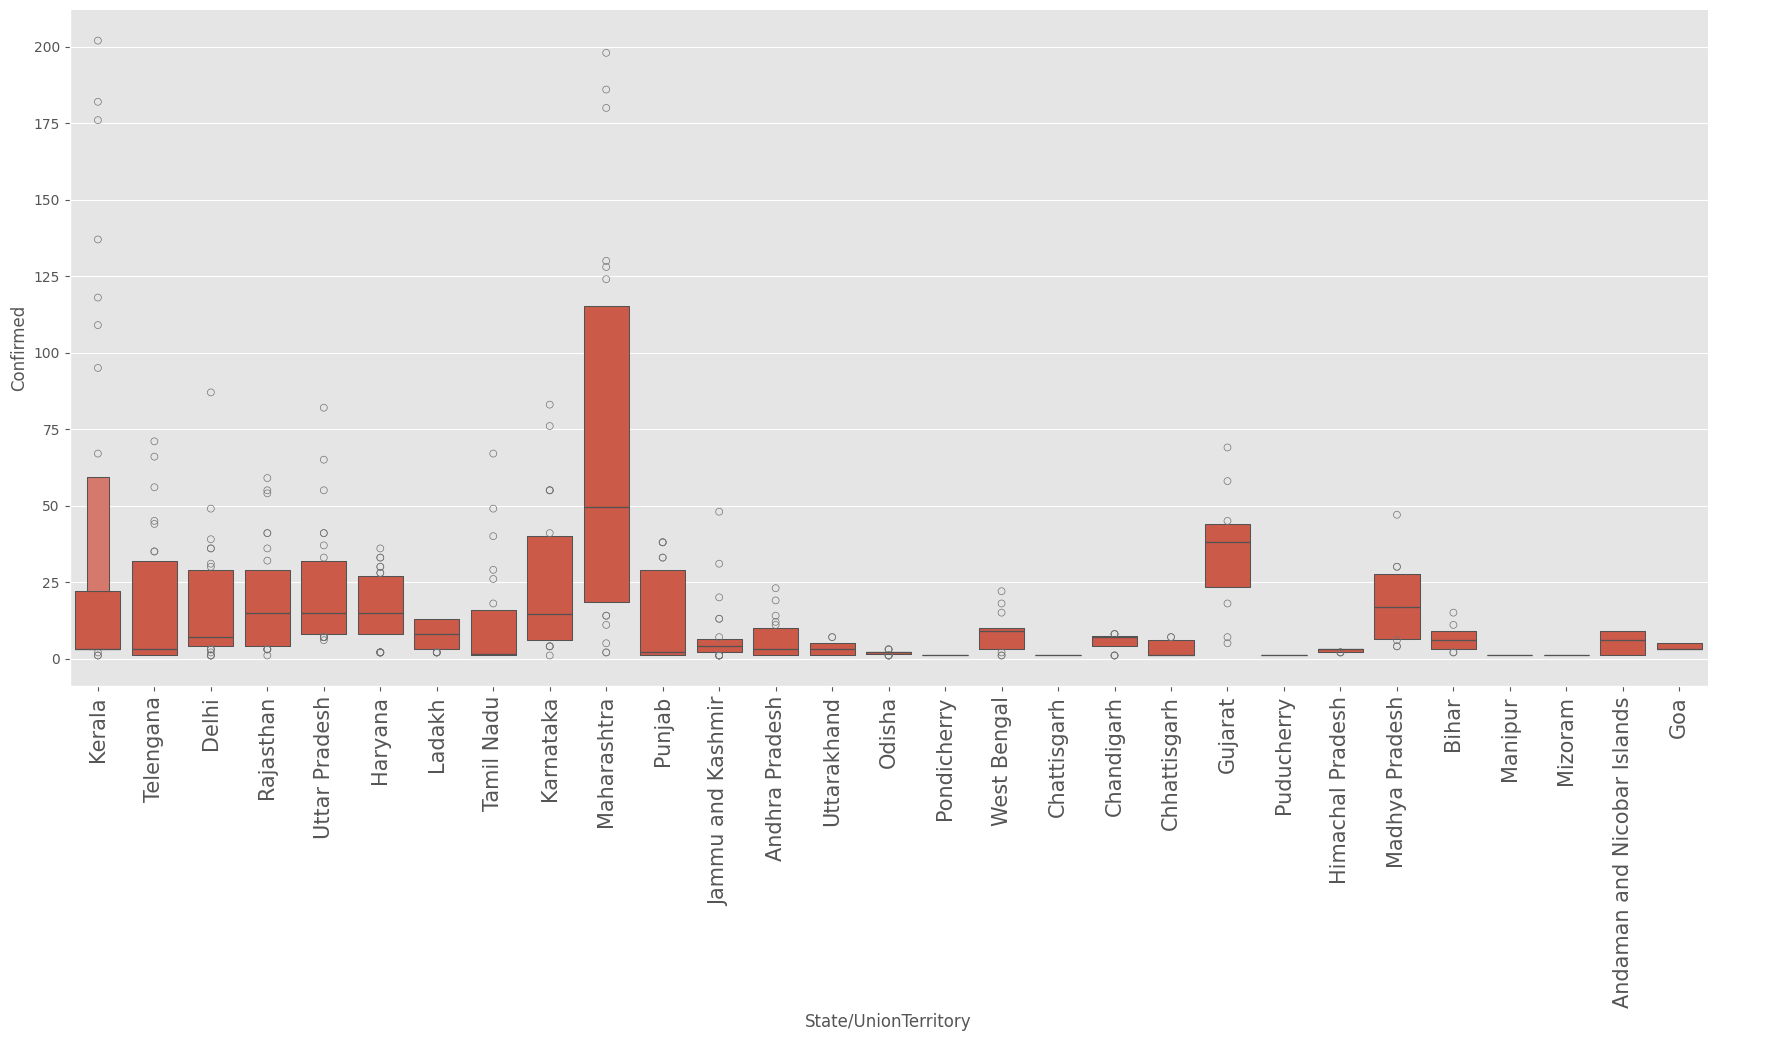

In [ ]:
g=sns.catplot(x='State/UnionTerritory',y='Confirmed',kind='boxen',data=covid_19_india)
g.fig.set_figwidth(20)
g.fig.set_figheight(8)
g.set_xticklabels(rotation=90,fontsize=15)

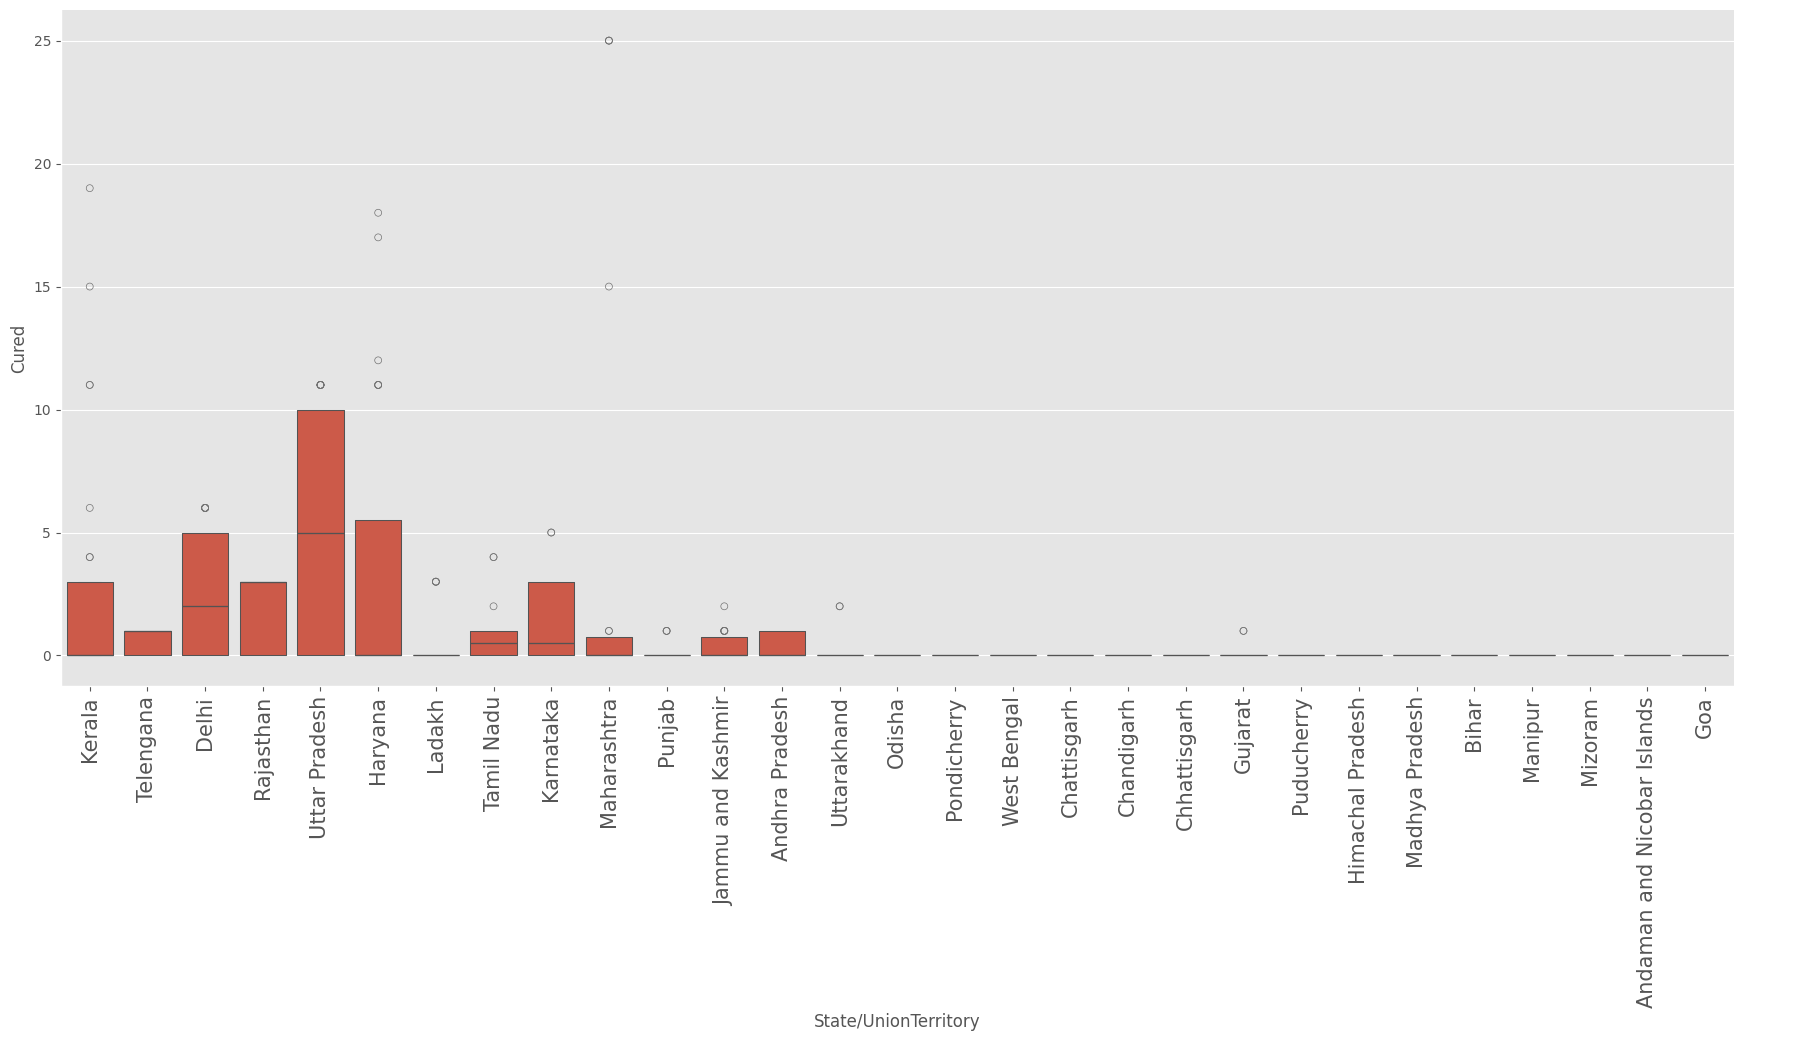

In [ ]:
g=sns.catplot(x='State/UnionTerritory',y='Cured',kind='boxen',data=covid_19_india)
g.fig.set_figwidth(20)
g.fig.set_figheight(8)
g.set_xticklabels(rotation=90,fontsize=15)

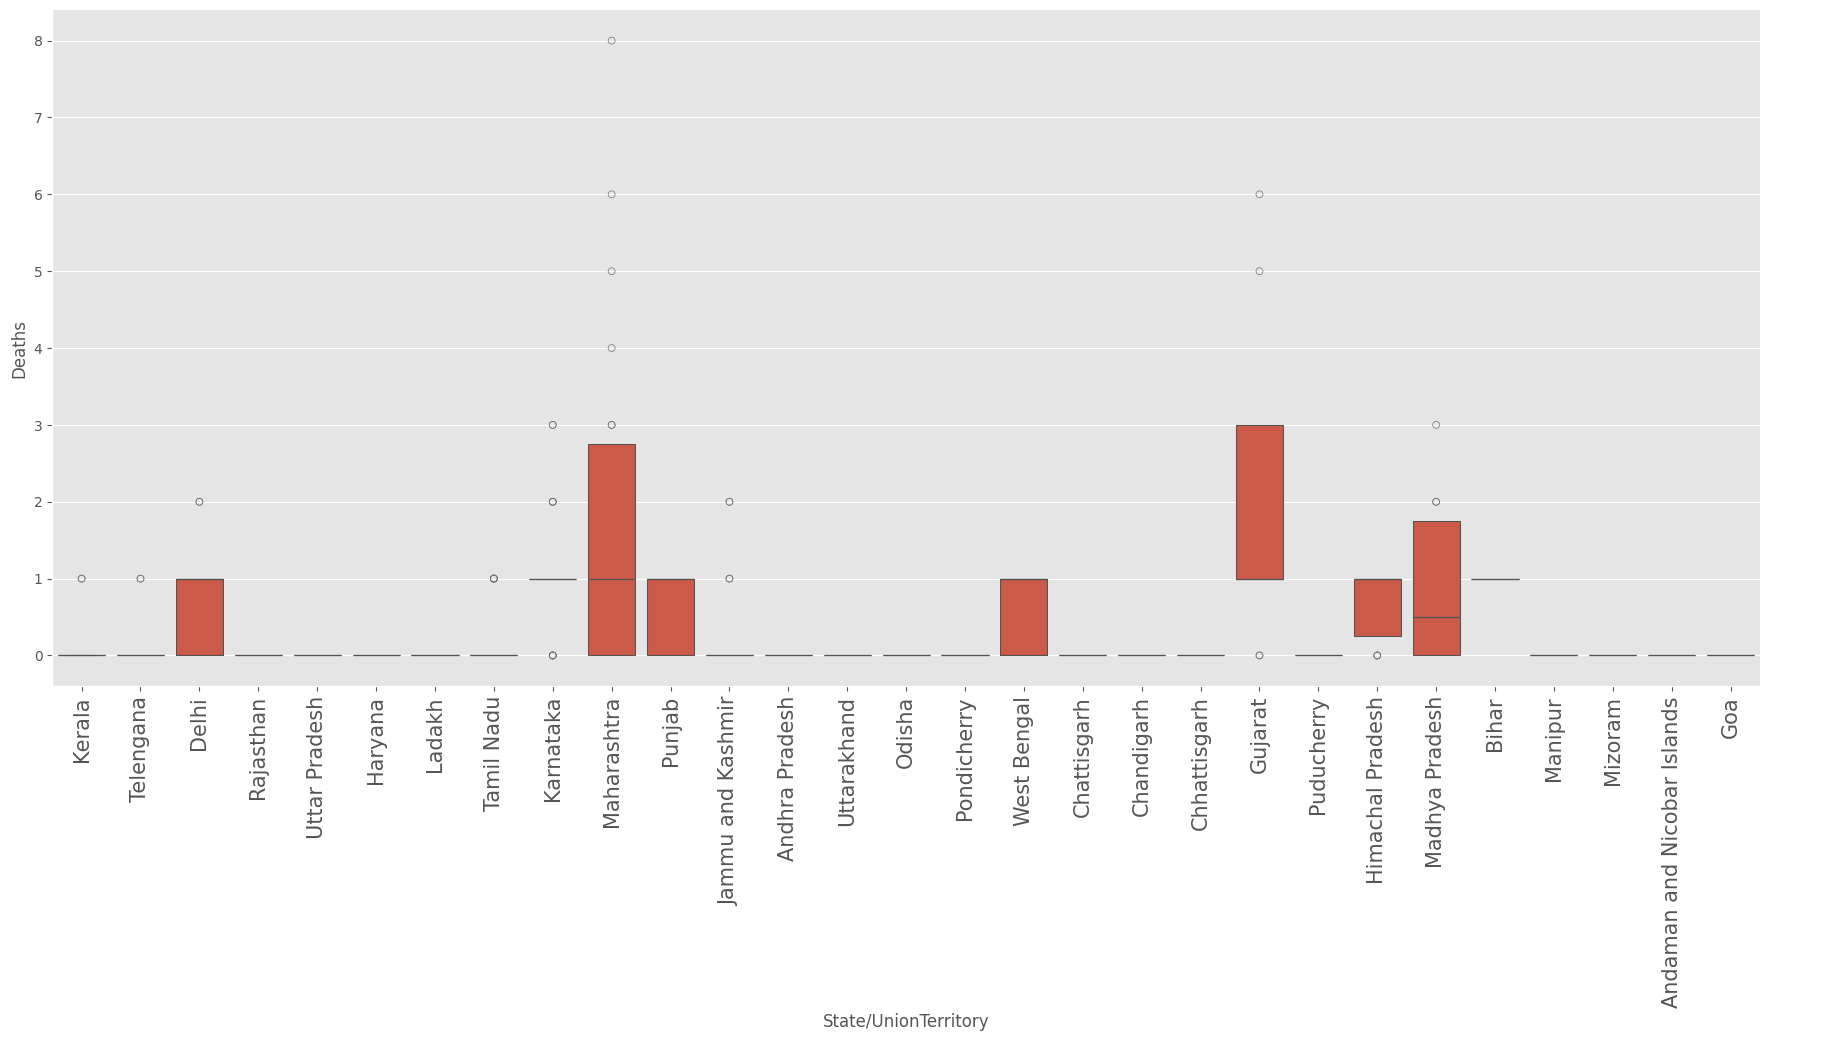

In [ ]:
g=sns.catplot(x='State/UnionTerritory',y='Deaths',kind='boxen',data=covid_19_india)
g.fig.set_figwidth(20)
g.fig.set_figheight(8)
g.set_xticklabels(rotation=90,fontsize=15)

Label Encoding

In [ ]:
lbl=LabelEncoder()
covid_19_india['State/UnionTerritory']=lbl.fit_transform(covid_19_india['State/UnionTerritory'])
covid_19_india['date']=covid_19_india['Date'].dt.day
covid_19_india['month']=covid_19_india['Date'].dt.month

In [ ]:
tree=DecisionTreeRegressor()
linear=LinearRegression()
logistic=LogisticRegression()
nb=GaussianNB()
forest=RandomForestClassifier()

Splitting traing and testing data

In [ ]:
x=covid_19_india[['State/UnionTerritory','date','month','Cured','Deaths','ConfirmedIndianNational','ConfirmedForeignNational']]
y=covid_19_india['Confirmed']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

Fitting models

In [ ]:
tree.fit(x_train,y_train)
linear.fit(x_train,y_train)
logistic.fit(x_train,y_train)
nb.fit(x_train,y_train)
forest.fit(x_train,y_train)

RandomForestClassifier()


Predictions and Comparing accuracy

In [ ]:
from sklearn.metrics import r2_score
prediction=tree.predict(x_test)
score1=r2_score(y_test,prediction)

In [ ]:
prediction=logistic.predict(x_test)
score2=r2_score(y_test,prediction)

In [ ]:
prediction=linear.predict(x_test)
score3=r2_score(y_test,prediction)

In [ ]:
prediction=forest.predict(x_test)
score4=r2_score(y_test,prediction)

In [ ]:
prediction=nb.predict(x_test)
score5=r2_score(y_test,prediction)

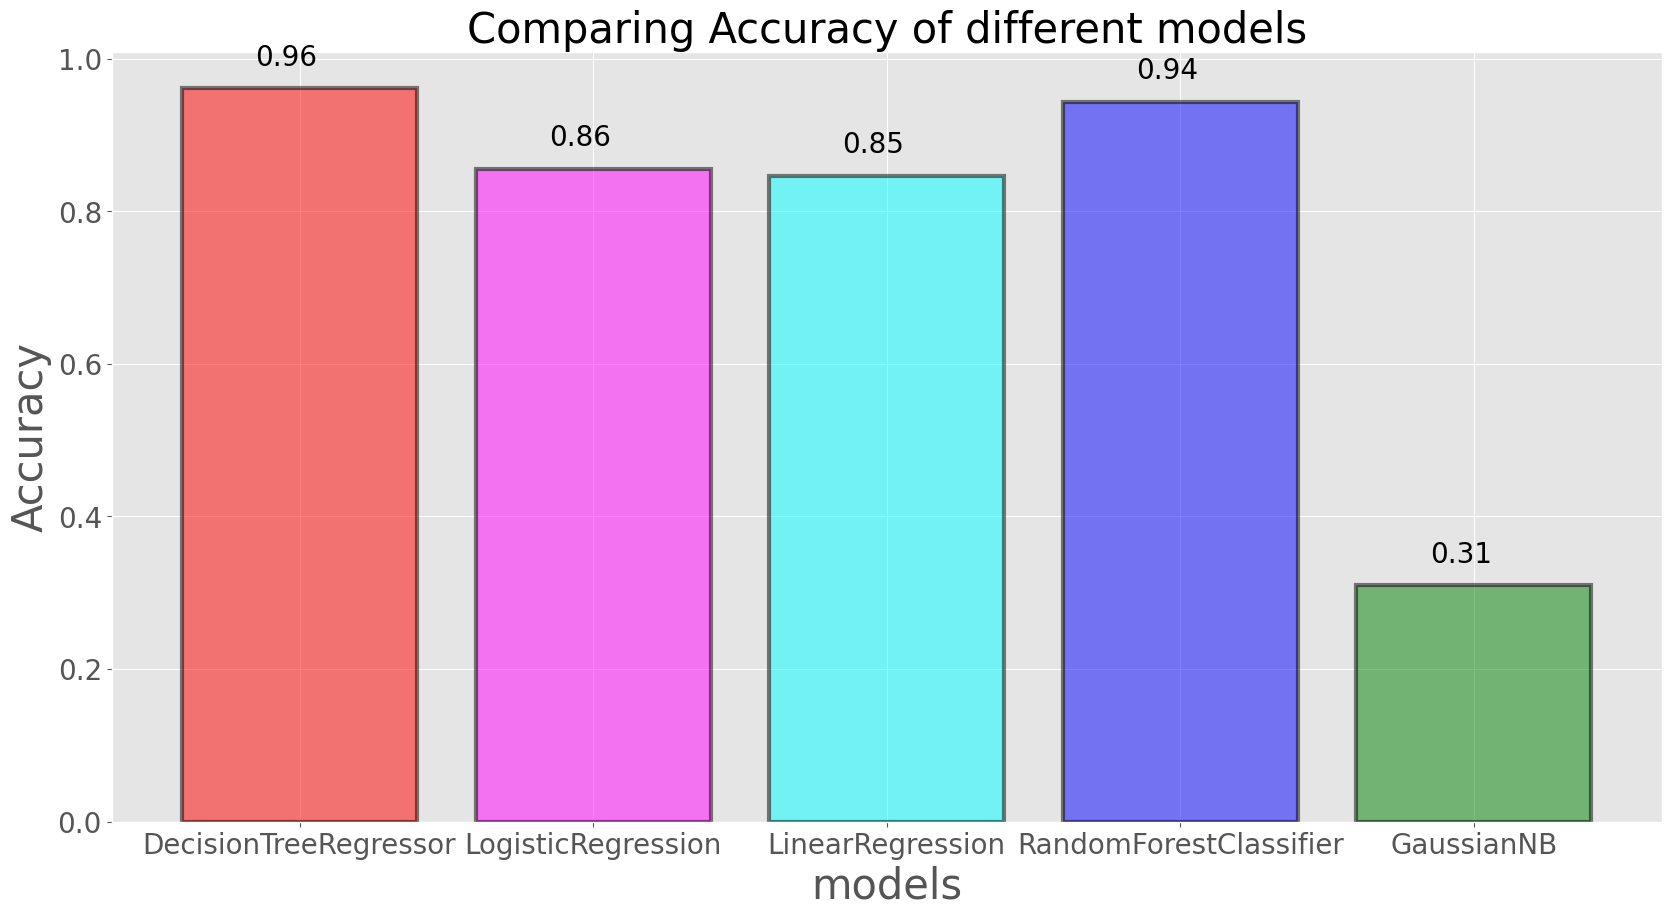

In [ ]:
scores=[score1,score2,score3,score4,score5]
models=['DecisionTreeRegressor','LogisticRegression','LinearRegression','RandomForestClassifier','GaussianNB']
plt.figure(figsize=(20,10))
plt.title('Comparing Accuracy of different models',fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('models',fontsize=30)
plt.ylabel('Accuracy',fontsize=30)
plt.bar(models,scores,color=['red','magenta','cyan','blue','green'],alpha=0.5,linewidth=3,edgecolor='black')
for i,v in enumerate(scores):
    plt.text(i-.15,v+.03,format(scores[i],'.2f'),fontsize=20)